# **Problem Statement**

## Business Context

A sales forecast is a prediction of future sales revenue based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals. A company needs to make an accurate sales forecast as it adds value across an organization and helps the different verticals to chalk out their future course of action.

Forecasting helps an organization plan its sales operations by region and provides valuable insights to the supply chain team regarding the procurement of goods and materials. An accurate sales forecast process has many benefits which include improved decision-making about the future and reduction of sales pipeline and forecast risks. Moreover, it helps to reduce the time spent in planning territory coverage and establish benchmarks that can be used to assess trends in the future.

## Objective

SuperKart is a retail chain operating supermarkets and food marts across various tier cities, offering a wide range of products. To optimize its inventory management and make informed decisions around regional sales strategies, SuperKart wants to accurately forecast the sales revenue of its outlets for the upcoming quarter.

To operationalize these insights at scale, the company has partnered with a data science firm—not just to build a predictive model based on historical sales data, but to develop and deploy a robust forecasting solution that can be integrated into SuperKart’s decision-making systems and used across its network of stores.

## Data Description

The data contains the different attributes of the various products and stores.The detailed data dictionary is given below.

- **Product_Id** - unique identifier of each product, each identifier having two letters at the beginning followed by a number.
- **Product_Weight** - weight of each product
- **Product_Sugar_Content** - sugar content of each product like low sugar, regular and no sugar
- **Product_Allocated_Area** - ratio of the allocated display area of each product to the total display area of all the products in a store
- **Product_Type** - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
- **Product_MRP** - maximum retail price of each product
- **Store_Id** - unique identifier of each store
- **Store_Establishment_Year** - year in which the store was established
- **Store_Size** - size of the store depending on sq. feet like high, medium and low
- **Store_Location_City_Type** - type of city in which the store is located like Tier 1, Tier 2 and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
- **Store_Type** - type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2 and Food Mart
- **Product_Store_Sales_Total** - total revenue generated by the sale of that particular product in that particular store


# **Installing and Importing the necessary libraries**

In [2]:
#Installing the libraries with the specified versions
!pip install numpy==2.0.2 pandas==2.2.2 scikit-learn==1.6.1 matplotlib==3.10.0 seaborn==0.13.2 joblib==1.4.2 xgboost==2.1.4 requests==2.32.3 huggingface_hub==0.30.1 -q

**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# For splitting the dataset
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
)
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# Libraries to get different metric scores
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error
)

# To create the pipeline
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline,Pipeline

# To tune different models and standardize
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler,OneHotEncoder

# To serialize the model
import joblib

# os related functionalities
import os

# API request
import requests

# for hugging face space authentication to upload files
from huggingface_hub import login, HfApi

# **Loading the dataset**

In [2]:
#Loading the data from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/SuperKart.csv')

In [4]:
#Making a copy of the data
data = df.copy()

# **Data Overview**

In [5]:
# Taking a look at the first 5 rows of data
data.head()

Product_Id  Product_Weight Product_Sugar_Content  Product_Allocated_Area  \
0     FD6114           12.66             Low Sugar                   0.027   
1     FD7839           16.54             Low Sugar                   0.144   
2     FD5075           14.28               Regular                   0.031   
3     FD8233           12.10             Low Sugar                   0.112   
4     NC1180            9.57              No Sugar                   0.010   

         Product_Type  Product_MRP Store_Id  Store_Establishment_Year  \
0        Frozen Foods       117.08   OUT004                      2009   
1               Dairy       171.43   OUT003                      1999   
2              Canned       162.08   OUT001                      1987   
3        Baking Goods       186.31   OUT001                      1987   
4  Health and Hygiene       123.67   OUT002                      1998   

  Store_Size Store_Location_City_Type          Store_Type  \
0     Medium                   Tier 2   Supermarket Type2   
1     Medium                   Tier 1  Departmental Store   
2       High                   Tier 2   Supermarket Type1   
3       High                   Tier 2   Supermarket Type1   
4      Small                   Tier 3           Food Mart   

   Product_Store_Sales_Total  
0                    2842.40  
1                    4830.02  
2                    4130.16  
3                    4132.18  
4                    2279.36

In [6]:
#Taking a look at the last 5 rows of data
data.tail()

Product_Id  Product_Weight Product_Sugar_Content  Product_Allocated_Area  \
8758     NC7546           14.80              No Sugar                   0.016   
8759      NC584           14.06              No Sugar                   0.142   
8760     NC2471           13.48              No Sugar                   0.017   
8761     NC7187           13.89              No Sugar                   0.193   
8762      FD306           14.73             Low Sugar                   0.177   

            Product_Type  Product_MRP Store_Id  Store_Establishment_Year  \
8758  Health and Hygiene       140.53   OUT004                      2009   
8759           Household       144.51   OUT004                      2009   
8760  Health and Hygiene        88.58   OUT001                      1987   
8761           Household       168.44   OUT001                      1987   
8762         Snack Foods       224.93   OUT002                      1998   

     Store_Size Store_Location_City_Type         Store_Type  \
8758     Medium                   Tier 2  Supermarket Type2   
8759     Medium                   Tier 2  Supermarket Type2   
8760       High                   Tier 2  Supermarket Type1   
8761       High                   Tier 2  Supermarket Type1   
8762      Small                   Tier 3          Food Mart   

      Product_Store_Sales_Total  
8758                    3806.53  
8759                    5020.74  
8760                    2443.42  
8761                    4171.82  
8762                    2186.08

In [7]:
# Looking at the shape of the dataset
data.shape

(8763, 12)

* There are 8763 rows and 12 columns in the dataset

##Checking the data types

In [8]:
#Checking the datatypes for each of the variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


* We have 7 object variables, 4 floats, and 1 integer. It seems from a glance that we don't have any missing values in the dataset as there are 8763 non-null values within each column.

## Statistical Summary - Numeric

In [9]:
# Getting the statistical summary of the numeric data in the dataset
data.describe()

Product_Weight  Product_Allocated_Area  Product_MRP  \
count     8763.000000             8763.000000  8763.000000   
mean        12.653792                0.068786   147.032539   
std          2.217320                0.048204    30.694110   
min          4.000000                0.004000    31.000000   
25%         11.150000                0.031000   126.160000   
50%         12.660000                0.056000   146.740000   
75%         14.180000                0.096000   167.585000   
max         22.000000                0.298000   266.000000   

       Store_Establishment_Year  Product_Store_Sales_Total  
count               8763.000000                8763.000000  
mean                2002.032751                3464.003640  
std                    8.388381                1065.630494  
min                 1987.000000                  33.000000  
25%                 1998.000000                2761.715000  
50%                 2009.000000                3452.340000  
75%                 2009.000000                4145.165000  
max                 2009.000000                8000.000000

**Product_Weight:**
* The mean (12.65) and 50 percentile (12.66) are pretty close suggesting a normally distribution
* Minimum is 4, Max is 22, and standard deviation is 2.21 - suggesting outliers on both ends

**Product_Allocated_Area:**
* The mean (0.068) and 50 percentile (0.056) suggest the distribution is right skewed - meaning SuperKart only gives a lot of retail space to few items
* Minimum is 0.004, Max is 0.298, and standard deviation is 0.048 - suggesting many outliers on the larger end of the distribution

**Product_MRP:**
* The mean (147.03) and 50 percentile (146.74) suggest a normal distribution
* Min is 31, Max is 266, and std is 30.69 - suggesting outliers on both ends

**Store_Establishment_Year: (our only integer value)**
* The mean (2002) and 50 percentile (2009) suggest a left skewed distribution, meaning there are more newer stores than older ones
* Min is 1987, Max is 2009 and std is ~8. Interesting to note also that the median and Max are the same, further confirming that 50% of stores were built in 2009, and most after 2001.

**Product_Store_Sales_Total: (our target variable)**
* The mean (3464) and 50 percentile (3452) suggest a normal distribution of values
* Min is 33 (which might be a typo as product MRP min is 31 - meaning that one particular store only sold about 1 item of the lowest value), Max is 8000, and std is 1065 - suggesting outliers on both ends as most stores will generate between ~2400 and ~4500 in revenue.


## Statistical Summary - Categorical

In [10]:
# Getting the statistical summary of the categorical data
data.describe(include='object')

Product_Id Product_Sugar_Content           Product_Type Store_Id  \
count        8763                  8763                   8763     8763   
unique       8763                     4                     16        4   
top         FD306             Low Sugar  Fruits and Vegetables   OUT004   
freq            1                  4885                   1249     4676   

       Store_Size Store_Location_City_Type         Store_Type  
count        8763                     8763               8763  
unique          3                        3                  4  
top        Medium                   Tier 2  Supermarket Type2  
freq         6025                     6262               4676

**Product_ID:**
* As pointed out in the data descriptions, this is unique to each item with 8763 values and 8763 unique values

**Product_Sugar_Content:**
* This variable contains 4 unique values
* "Low Sugar" is the most frequent value with over half of all values (~55%)

**Product_Type:**
* There are 16 unique values within Product Type
* "Fruits and Vegetables" is the most common with about 14% of all sales

**Store_Id:**
* There are 4 unique Store Ids
* "OUT004" is the most frequent at ~53% of all values - suggesting it carries more products than the other 3 stores combined.

**Store_Size:**
* There are 3 unique values and from the data descriptions, I assume High, Medium, and Low
* "Medium" is the most frequent at ~68% of all values

**Store_Location_City_Type:**
* As the data description pointed out, there are 3 unique values - Tier 1, 2 and 3
* "Tier 2" is the most frequent at ~71% of all values

**Store_Type:**
* As the data description pointed out, there are 4 unique values
* "Supermarket Type2" is the most frequent with ~53% of all values

## Duplicated Value Check

In [11]:
# Checking the data for duplicate values
data.duplicated().sum()

np.int64(0)

* There are no missing values in the dataset.

## Missing Value Check

In [12]:
# Checking for missing values in the dataset
data.isnull().sum()

Product_Id                   0
Product_Weight               0
Product_Sugar_Content        0
Product_Allocated_Area       0
Product_Type                 0
Product_MRP                  0
Store_Id                     0
Store_Establishment_Year     0
Store_Size                   0
Store_Location_City_Type     0
Store_Type                   0
Product_Store_Sales_Total    0
dtype: int64

* There are also no missing values in the dataset, so we are clear to proceed without treatment.

# **Exploratory Data Analysis (EDA)**

## Univariate Analysis

###Utility Functions

In [13]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n]
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Numeric Data Exploration

####Product_Weight

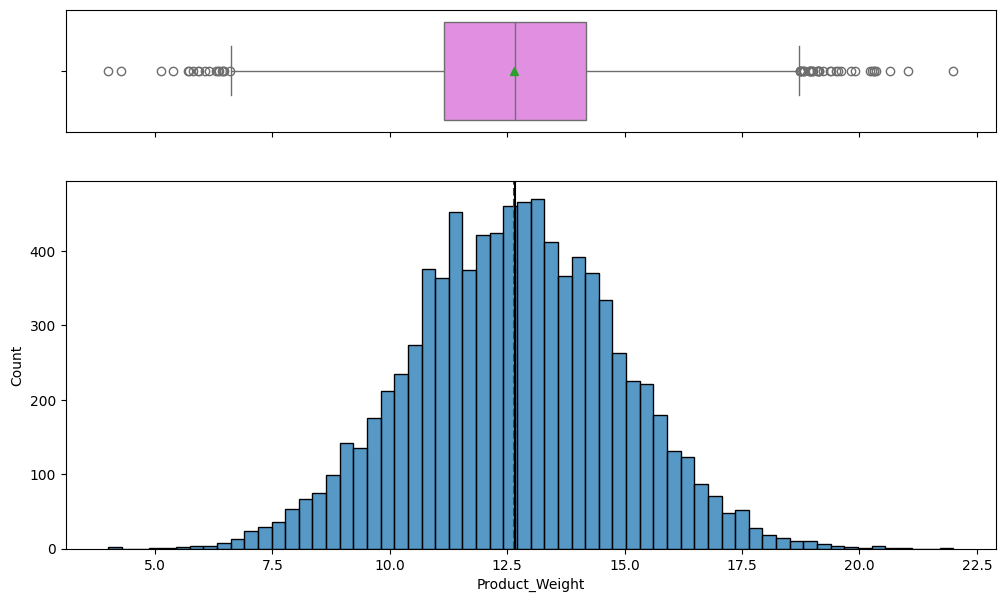

In [15]:
# Plotting the distribution of Product Weight
histogram_boxplot(data, "Product_Weight")

* As the statistical summary showed, the distribution is normal with 50% of the products having a weight between ~11 and 14. There are multiple outliers on both ends as well.

#### Product_Allocated_Area

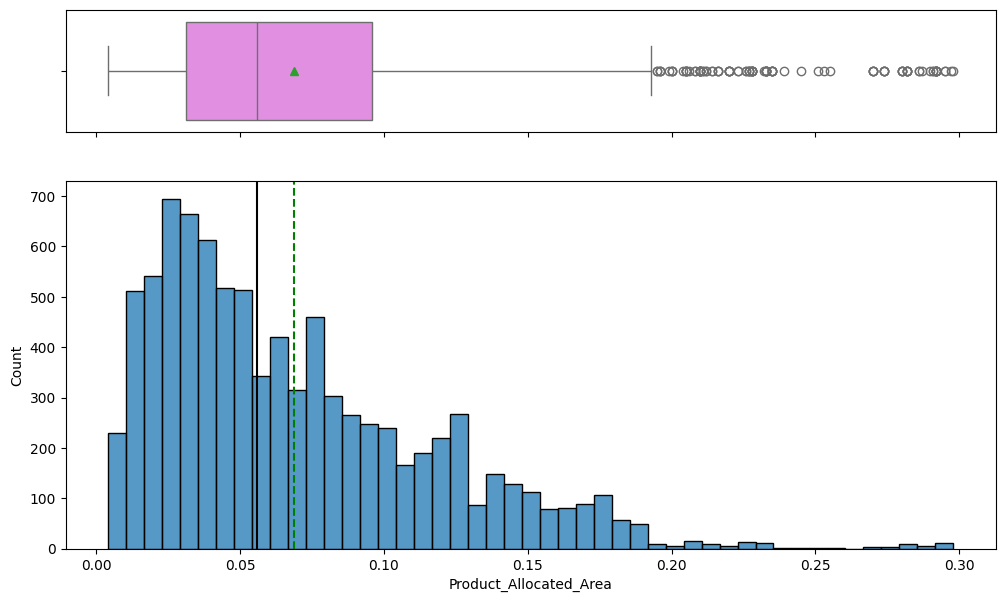

In [16]:
# Plotting the distribution of Product Allocation Area
histogram_boxplot(data, "Product_Allocated_Area")

* Again, true to the statistical summary, we see that the distribution is highly right skewed. 75% of the products get less than 0.10 space. 25% getting between 0.10 and 0.18, and multiple outliers getting .20 or more in retail space.

#### Product_MRP

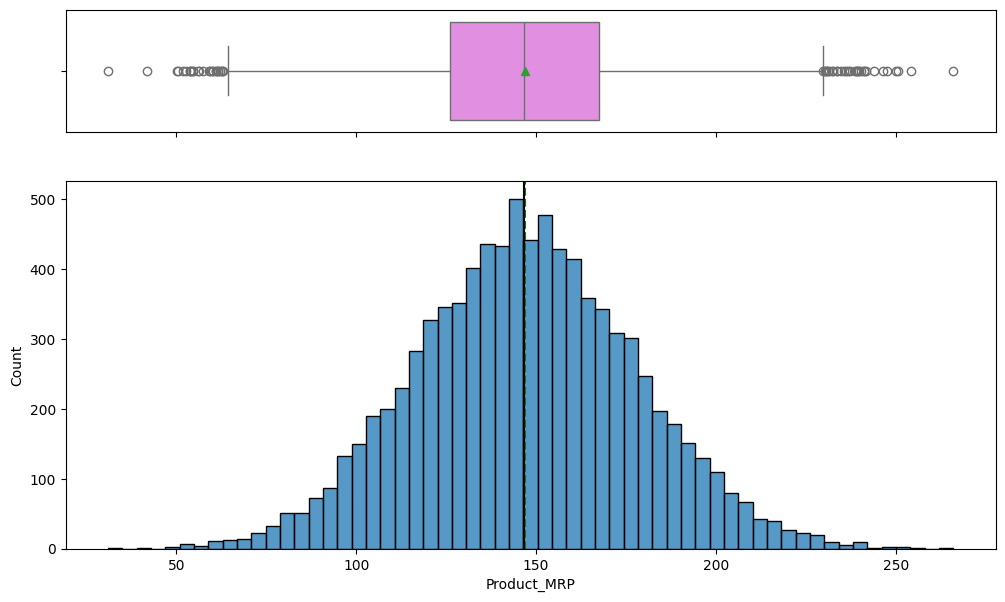

In [17]:
# Plotting the distribution of Product MRP
histogram_boxplot(data, "Product_MRP")

* The distribution for Product Max Retail Price is very normal. 50% of the products are priced between ~ 130 and 180 with a few outliers less than ~75 and more than ~230.

#### Store_Establishment_Year

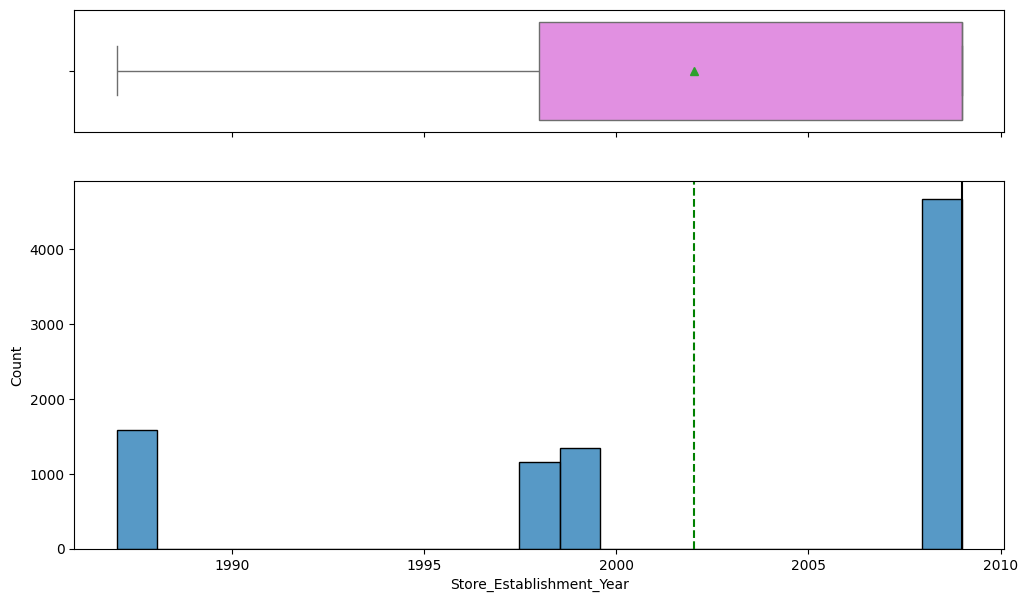

In [18]:
# Plotting the distribution of Store Establishment Year
histogram_boxplot(data, "Store_Establishment_Year")

* It seems all 4 stores were built in different years ranging from 1987 - 2009.

In [19]:
data.Store_Establishment_Year.unique()

array([2009, 1999, 1987, 1998])

#### Product_Store_Sales_Total

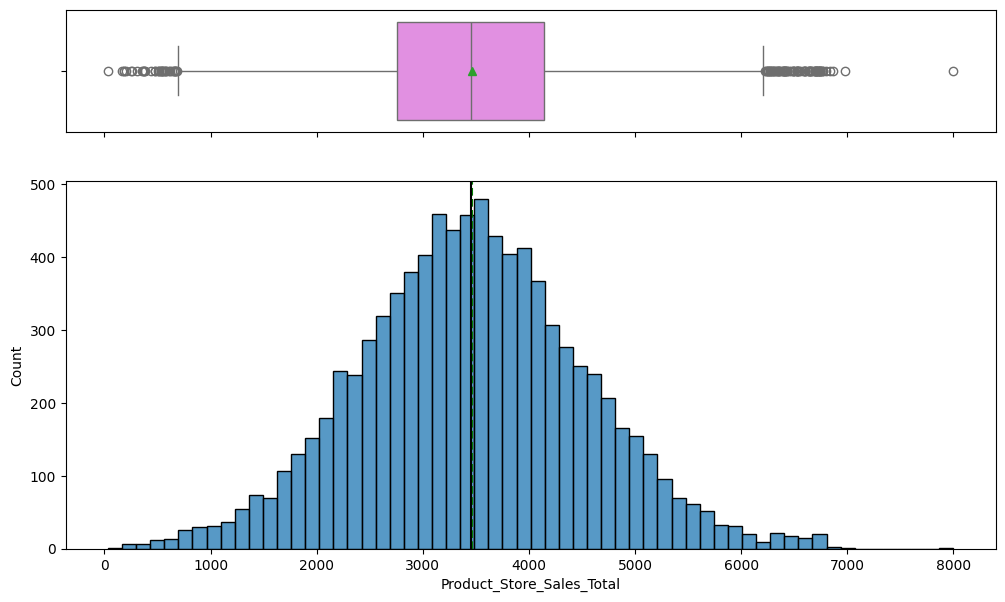

In [20]:
# Plotting the distribution of Product_Store_Sales_Total
histogram_boxplot(data, "Product_Store_Sales_Total")

* The distribution is normal, with a mean of ~ 3500. There are multiple outliers on both sides of the distribution.

### Categorical Data Exploration

**As Product_Id is a unique value for each item carried, we will forego plotting that variable**

#### Product_Sugar_Content

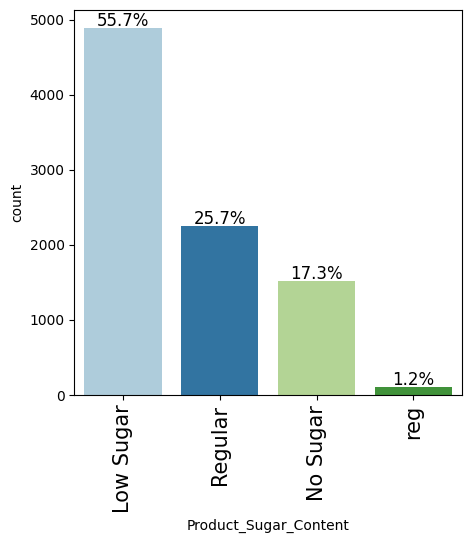

In [21]:
# Plotting the distribution of Product_Sugar_Content
labeled_barplot(data, "Product_Sugar_Content", perc=True)

* As seen earlier, there are 4 unique values and Low Sugar makes up more than half of all values in the distribution.

#### Product_Type

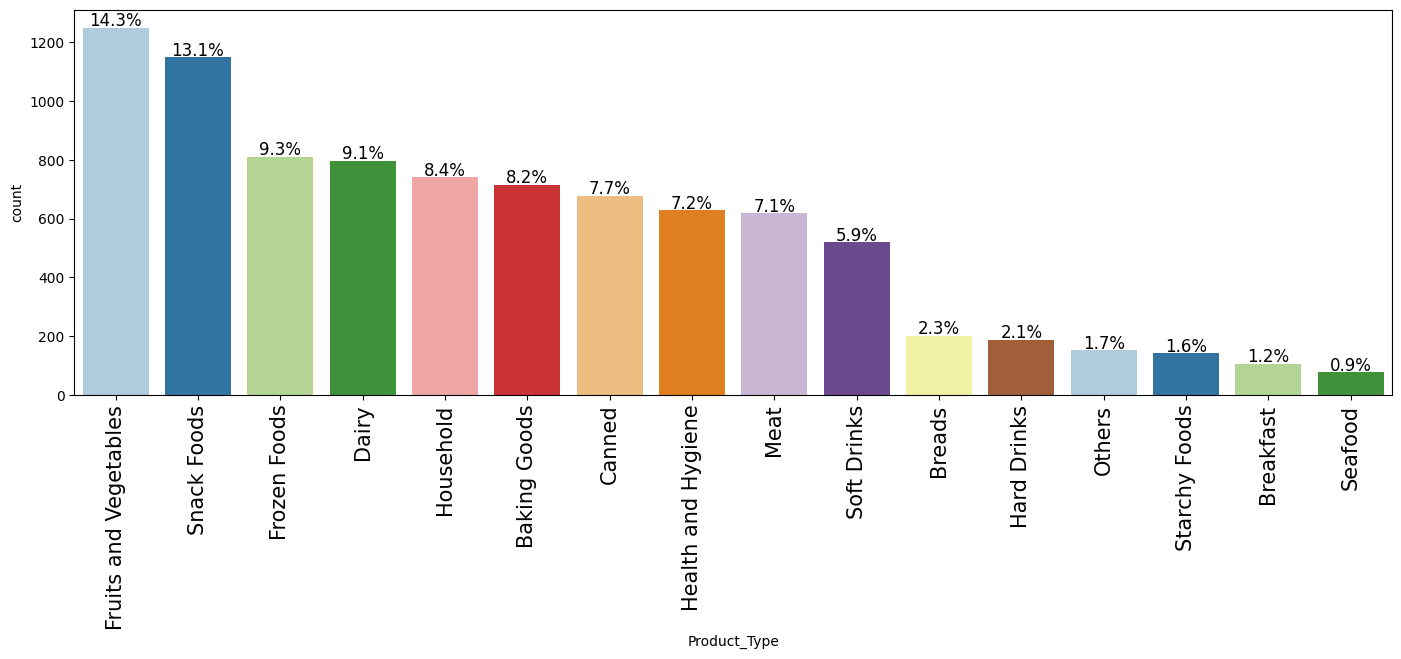

In [22]:
# Plotting the distribution of Product_Type
labeled_barplot(data, "Product_Type", perc=True)

* There are 16 unique values in the dataset. Fruits and Vegetables is the most common with ~14% of all values. Snack Foods is also quite common at ~13%.

#### Store_Id

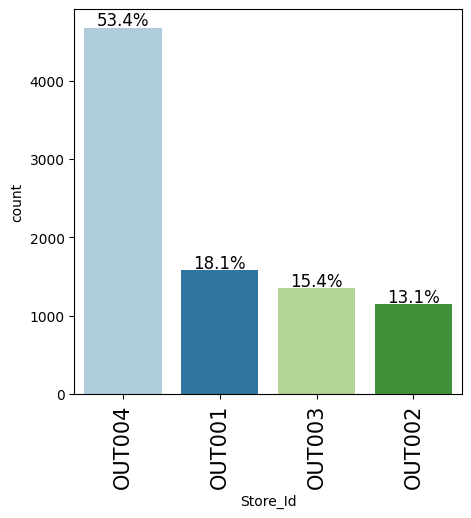

In [23]:
# Plotting the distribution of Store_Id
labeled_barplot(data, "Store_Id", perc=True)

* There are 4 unique values in the Store_Id variable of the dataset with OUT004 being by far the most common - making up over half of all values.

#### Store_Size

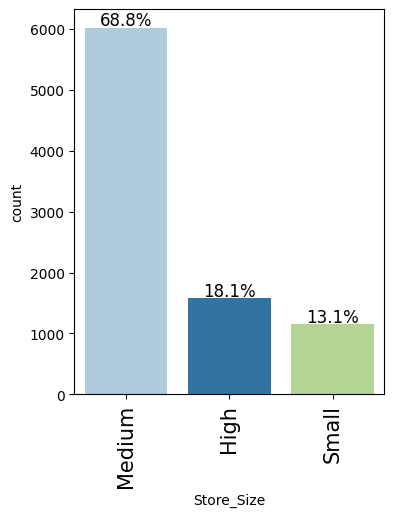

In [24]:
# Plotting the distribution of Store_Size
labeled_barplot(data, "Store_Size", perc=True)

* This variable consists of 3 unique values - Small, Medium, and High. Medium is the most common at around ~68% of all values.

#### Store_Location_City_Type

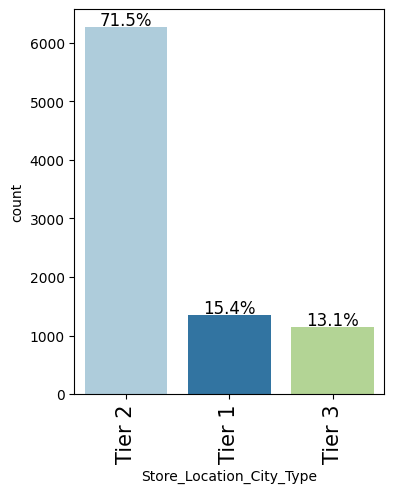

In [25]:
# Plotting the distribution of Store_Location_City_Type
labeled_barplot(data, "Store_Location_City_Type", perc=True)

* There are 3 unique values within this variable - Tier 1, 2, and 3. The vast majority of products that carried/sold are located in cities with a medium standard of living at ~71% of all values.

#### Store_Type

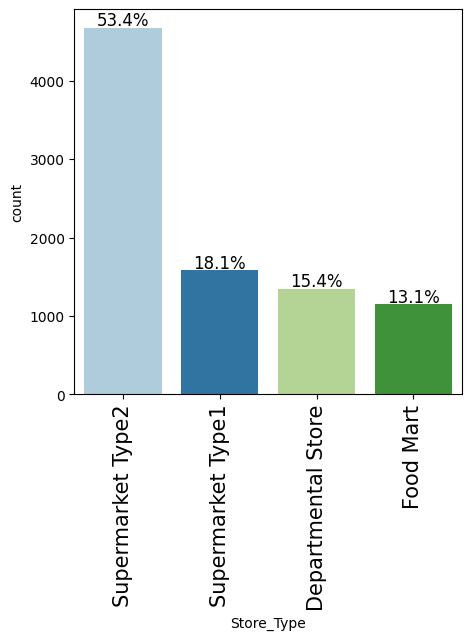

In [26]:
# Plotting the distribution of Store_Type
labeled_barplot(data, "Store_Type", perc=True)

* There are 4 unique values within this variable with "Supermarket Type2" making up over half of all values at ~53%.
* Also of note, these values are the exact same values given by Store Id.

## Bivariate Analysis

### Correlation Matrix for Numeric Variables

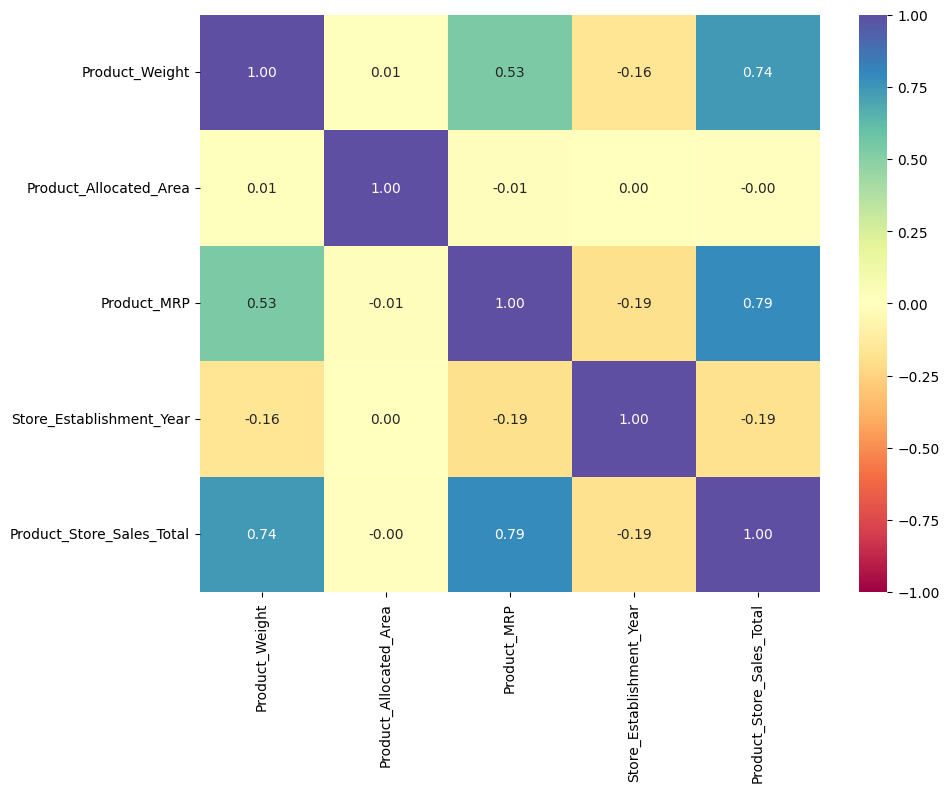

In [27]:
# Adding my numeric variables to a list
num_vars = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Plotting the heatmap
plt.figure(figsize=(10, 7.5))
sns.heatmap(data[num_vars].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There are very few negatively correlated values in the dataset.
* There are no values that are so highly correlated that we can afford to drop any as features.
* The two most highly correlated variables are Product_MRP and our target variable, Product_Store_Sales_Total. I expect Product_MRP may be one of our more influential variables.
* Also of note, Product_Weight is just behind Product_MRP in terms of correlation with our target variable. It too will have a heavy influence.
* Not surprisingly, Product_Weight and Product_MRP are a medium strong correlation.
* It seems preliminarily that the more larger, high-priced items sell, the more money the stores make.

### Distribution of Numeric Variables wrt Target Variable

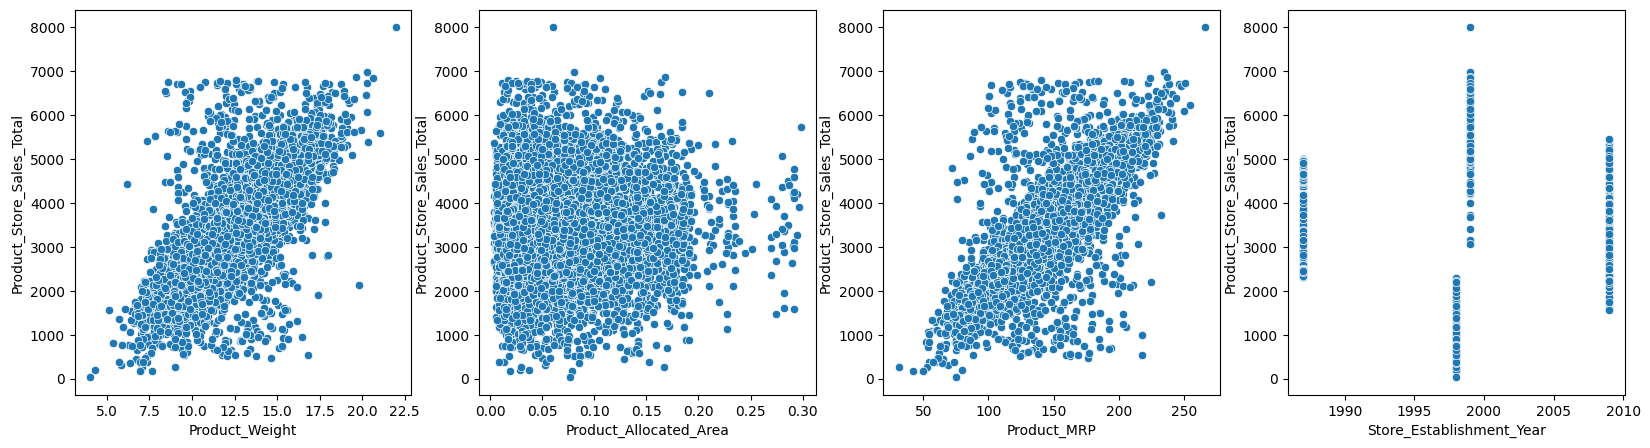

In [28]:
# Removing the target variable from our numeric variables list
num_vars.remove('Product_Store_Sales_Total')
# Setting up a nice-size horizontal plot
plt.figure(figsize=(20, 5))
# Looping through the variables in num_vars list and plotting a scatterplot with Product_Store_Sales_Total
for i, var in enumerate(num_vars):
    plt.subplot(1, len(num_vars), i + 1)
    sns.scatterplot(x=var, y='Product_Store_Sales_Total', data=data)
plt.show()

* As we gathered from the correlation matrix, there is a positive linear relationship between Product_Weight and Product_MRP with Product_Store_Sales_Total.
* There isn't really any clear relationship between Product_Allocated_Area and Store Sales other than to see that most of the store sales are coming from products under ~0.20 allocated area.
* Interestingly, stores built in 1987 and 2009 have similar, average performance in terms of Store Sales, but stores built in 1998 are the lowest performing while stores built in 1999 are the highest performing stores.
* This one floating point at the very top of Product Weight v. Sales, Allocated Area v. Sales, MPR v. Sales and only carried in stores established in 1999 is interesting. Let's try to isolate it to find out what it is.

In [29]:
# Attempting to isolate the floating outlier by filtering our data accordingly
isolation_df = data[(data['Product_Weight'] > 20) & (data['Store_Establishment_Year'] == 1999) & (data['Product_MRP'] > 250)]

In [30]:
isolation_df.shape

(1, 12)

In [31]:
isolation_df

Product_Id  Product_Weight Product_Sugar_Content  Product_Allocated_Area  \
4356     NC7325            22.0              No Sugar                    0.06   

     Product_Type  Product_MRP Store_Id  Store_Establishment_Year Store_Size  \
4356    Household        266.0   OUT003                      1999     Medium   

     Store_Location_City_Type          Store_Type  Product_Store_Sales_Total  
4356                   Tier 1  Departmental Store                     8000.0

* This singular item represents the maximum value in our original dataset in three separate variables, Product_Weight, Product_MRP, and Product_Store_Sales_Total.
* There is also a chance that this singular item is contributing to the 1999 store performing so well.
* We'll keep this in our back pocket to see if it becomes more important later. It could be that this is a major contributor to a very specialized store, or it could be an outlier that needs to be removed.
* For now, let's investigate how many other items have similar performance - specifically they are responsible for pulling in 30 times their Product_MRP in Store Sales Total

In [32]:
# Creating a dataframe where Product_Store_Sales_Total is more than 25 times the Product_MRP
power_item_df = data[data['Product_Store_Sales_Total'] >= 30 * data['Product_MRP']]
power_item_df

Product_Id  Product_Weight Product_Sugar_Content  Product_Allocated_Area  \
33       NC6961           13.99              No Sugar                   0.076   
67        FD576           11.17             Low Sugar                   0.016   
111       FD320           13.34             Low Sugar                   0.093   
115       FD432            9.16             Low Sugar                   0.142   
212       FD179           12.32             Low Sugar                   0.024   
...         ...             ...                   ...                     ...   
8636      FD505           11.95               Regular                   0.039   
8655      FD313            9.77             Low Sugar                   0.030   
8720       FD18           12.27             Low Sugar                   0.071   
8752      FD102           10.06             Low Sugar                   0.127   
8759      NC584           14.06              No Sugar                   0.142   

               Product_Type  Product_MRP Store_Id  Store_Establishment_Year  \
33                Household        71.99   OUT002                      1998   
67                     Meat       137.87   OUT004                      2009   
111                    Meat       124.78   OUT003                      1999   
115            Frozen Foods       117.08   OUT001                      1987   
212                  Canned       128.51   OUT004                      2009   
...                     ...          ...      ...                       ...   
8636          Starchy Foods       137.32   OUT003                      1999   
8655                  Dairy       132.65   OUT004                      2009   
8720  Fruits and Vegetables       149.58   OUT003                      1999   
8752            Snack Foods        93.41   OUT001                      1987   
8759              Household       144.51   OUT004                      2009   

     Store_Size Store_Location_City_Type          Store_Type  \
33        Small                   Tier 3           Food Mart   
67       Medium                   Tier 2   Supermarket Type2   
111      Medium                   Tier 1  Departmental Store   
115        High                   Tier 2   Supermarket Type1   
212      Medium                   Tier 2   Supermarket Type2   
...         ...                      ...                 ...   
8636     Medium                   Tier 1  Departmental Store   
8655     Medium                   Tier 2   Supermarket Type2   
8720     Medium                   Tier 1  Departmental Store   
8752       High                   Tier 2   Supermarket Type1   
8759     Medium                   Tier 2   Supermarket Type2   

      Product_Store_Sales_Total  
33                      2220.70  
67                      4447.91  
111                     5703.97  
115                     4364.15  
212                     4492.96  
...                         ...  
8636                    6588.50  
8655                    4328.48  
8720                    5543.03  
8752                    3998.13  
8759                    5020.74  

[320 rows x 12 columns]

* NICE! We've identified 320 items in the dataset that are "golden gooses" responsible for pulling 30 times thier Product_MSRP in Store Sales. We'll keep this in our back pocket and apply this in feature engineering.

In [33]:
# Getting the unique values of Product_Id's of Power Items in order to list them later when converting inputs from the Streamlit app
power_item_df['Product_Id'].unique()

array(['NC6961', 'FD576', 'FD320', 'FD432', 'FD179', 'FD193', 'DR7730',
       'FD5491', 'FD875', 'NC475', 'FD5447', 'NC548', 'NC278', 'NC208',
       'NC580', 'FD340', 'FD414', 'NC304', 'NC413', 'NC114', 'FD4812',
       'FD70', 'NC469', 'DR444', 'FD2017', 'FD1824', 'FD4966', 'FD172',
       'FD6473', 'FD4825', 'DR977', 'NC527', 'FD2295', 'FD4450', 'FD21',
       'FD560', 'NC59', 'FD182', 'FD581', 'FD188', 'NC4618', 'FD565',
       'NC551', 'FD2817', 'FD105', 'FD422', 'FD445', 'NC446', 'FD189',
       'DR7', 'FD135', 'NC9', 'FD185', 'FD6267', 'FD76', 'FD3633',
       'DR4259', 'FD4857', 'FD7168', 'FD5764', 'FD87', 'FD498', 'NC418',
       'FD1470', 'FD51', 'DR332', 'FD22', 'DR506', 'NC249', 'NC3594',
       'FD2233', 'FD350', 'FD113', 'FD43', 'DR312', 'NC761', 'FD122',
       'FD8676', 'FD585', 'NC6327', 'FD578', 'FD237', 'NC238', 'FD274',
       'FD253', 'FD8729', 'FD134', 'FD44', 'FD473', 'FD492', 'FD24',
       'FD1012', 'FD117', 'FD472', 'NC63', 'FD479', 'FD41', 'NC380',
       'D

### Distribution of Categorical Variables wrt Target Variable

In [34]:
# Adding a utility function here to plot categorical variables wrt Product_Store_Sales_Total
def cat_bivariate_barplot(feature):
    plt.figure(figsize=(8, 5))
    plt.xticks(rotation=90)
    # Group the data and calculate the sum of sales for each category
    grouped_data = data.groupby([feature], as_index=True)["Product_Store_Sales_Total"].sum().reset_index().sort_values(by='Product_Store_Sales_Total', ascending=False)
    # Calculate percentages
    total_sales = grouped_data['Product_Store_Sales_Total'].sum()
    grouped_data['Percentage'] = (grouped_data['Product_Store_Sales_Total'] / total_sales) * 100
    # Plot the barplot using the grouped data
    ax = sns.barplot(x=feature, y='Product_Store_Sales_Total', data=grouped_data, order=grouped_data[feature], palette="Paired")
    ax.set_xlabel(feature)
    ax.set_ylabel("Revenue")
    # Add percentage labels
    for i, row in enumerate(grouped_data.itertuples()):
        ax.text(i, row.Product_Store_Sales_Total, f"{row.Percentage:.1f}%", ha='center', va='bottom')
    # Add a title to the graph
    plt.title(f'Distribution of {feature} wrt Product_Store_Sales_Total')
    plt.show()

#### Product_Sugar_Content

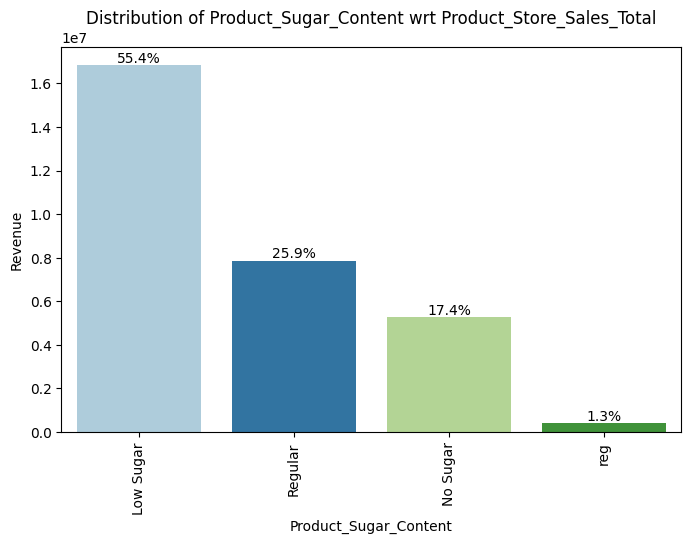

In [35]:
# Plotting the distribution of Product_Sugar_Content wrt Target Variable
cat_bivariate_barplot('Product_Sugar_Content')

* This distribution looks remarkably similar to our univariate distribution for Product Sugar Content, which is not too surprising.
* Low Sugar items are contributing the most to Store Sales, while Regular is the runner up.

#### Product_Type

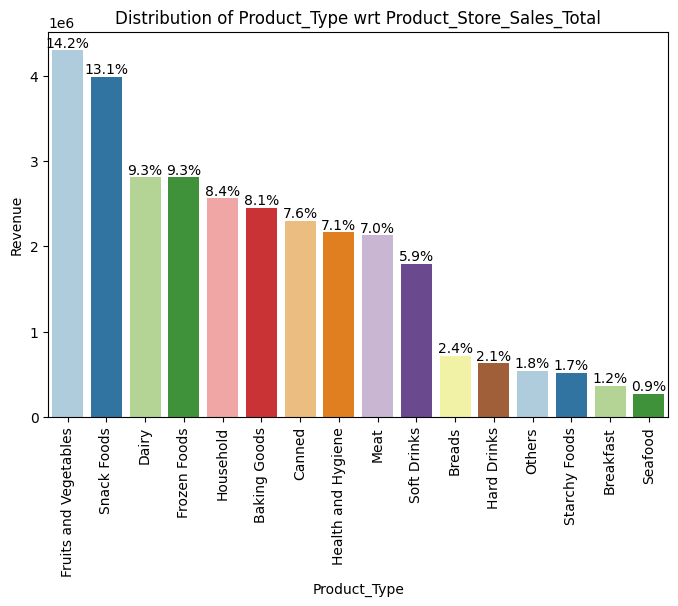

In [36]:
# Plotting the distribution of Product_Type wrt our Target Variable
cat_bivariate_barplot('Product_Type')

* Again, this looks very much like the Univariate Distribution from Product_Type.
* Fruits and Vegetables and Snack Foods are the largest contributors.
* Baking Goods, Canned, Dairy, Frozen Foods, Health and Hygeine, Household, Meat, and Soft Drinks are all medium-level contributors to Store Sales
* Breads, Breakfast, Hard Drinks, Othes, Seafood, and Starchy Foods are all low contributors to Store Sales.
* In the Data Preprocessing stage, we'll group the Product_Types by performance.

#### Store_Id

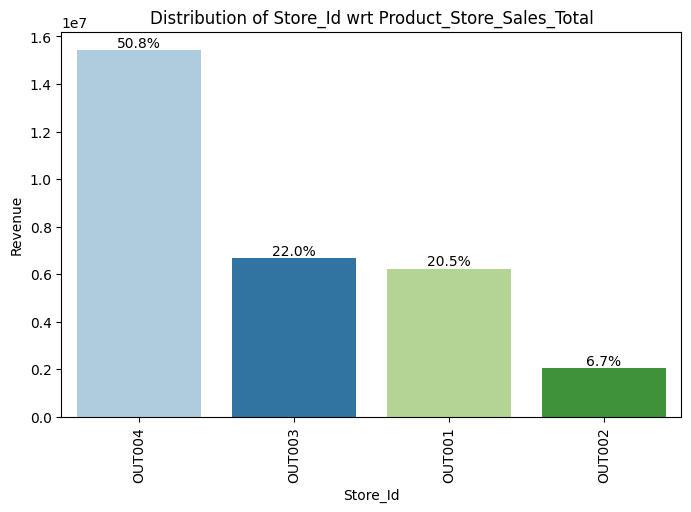

In [37]:
# Plotting the distribution of Store_Id wrt our Target Variable
cat_bivariate_barplot('Store_Id')

* Like the Univariate distribution, we see OUT004 as the major contributor to Store Sales

#### Store_Size

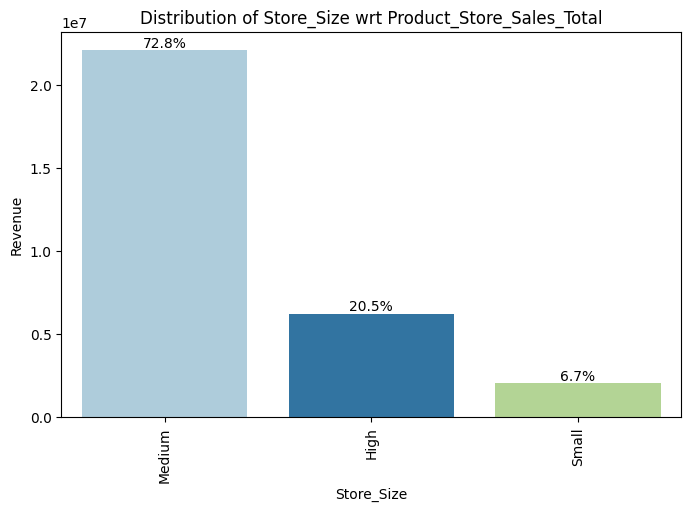

In [38]:
# Plotting the distribution of Store_Size wrt our Target Variable
cat_bivariate_barplot('Store_Size')

* Medium-sized stores are the largest contributor to Store Sales, followed by High and ending with Small.

#### Store_Location_City_Type

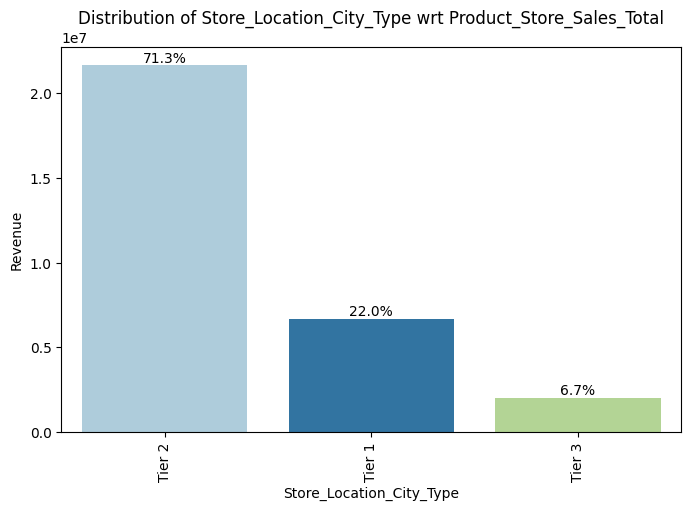

In [39]:
# Plotting the distribution of City Type wrt our Target Variable
cat_bivariate_barplot('Store_Location_City_Type')

* Tier2 cities are the largest contributor to Store Sales, followed by Tier1 and 3.

#### Store_Type

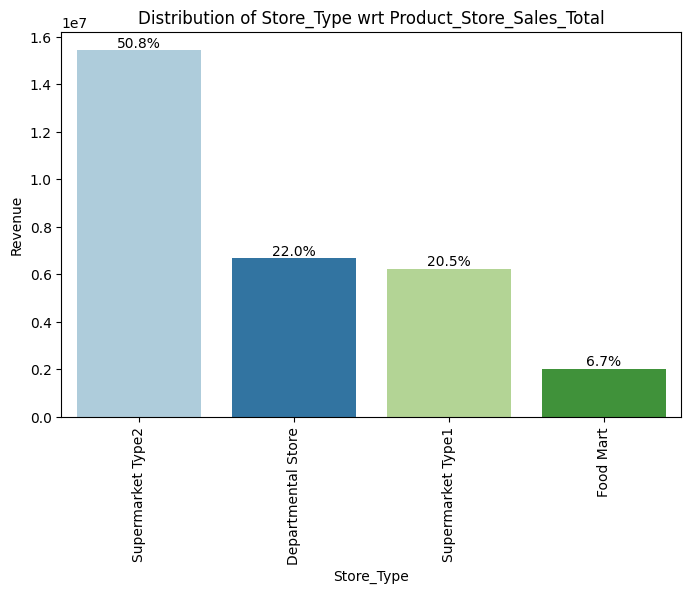

In [40]:
# Plotting the distribution of Store_Type wrt our Target Variable
cat_bivariate_barplot('Store_Type')

* Supermarket Type2 is the largest contributor to Store Sales, followed by Supermarket Type1, Departmenatal, and Food Mart.
* Also of note here, these values are an exact match of the values given by Store_Id, making these two variables redundant. We'll remove one of them in Data Preprocessing.

### Exploring Other Relationships

#### Product_Type wrt Product_Weight

In [41]:
def type_vs_boxplot(feature):
    plt.figure(figsize=(14, 5))
    sns.boxplot(data=data, x='Product_Type', y=feature, hue='Product_Type')
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {feature} by Product Type')
    plt.xlabel('Product Type')
    plt.ylabel(feature)
    plt.show()

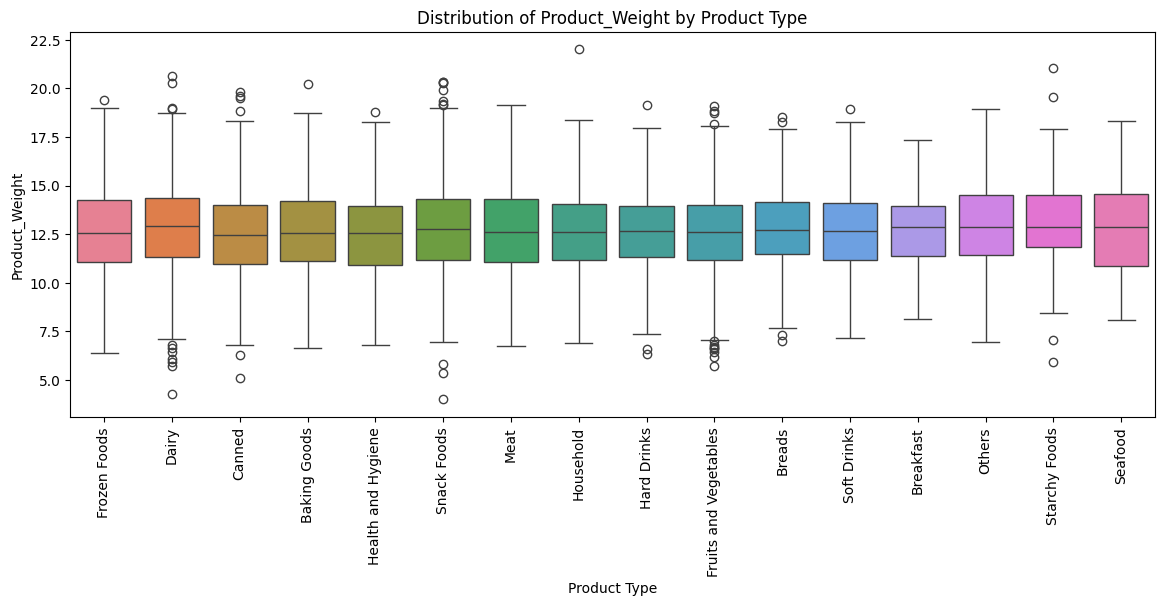

In [42]:
# Plotting the distribution of Product_Weight vs. Product_Type
type_vs_boxplot('Product_Weight')

* Nothing seems to be jumping out at us here. The distribution of weight across the Product Type classes seems to be pretty uniform besides the one outlier in Household, which we were able to isolate earlier.
* Nearly the majority of all products fall within a product weight range of ~11 - 15 units.

#### Product_Type wrt. Allocated Area

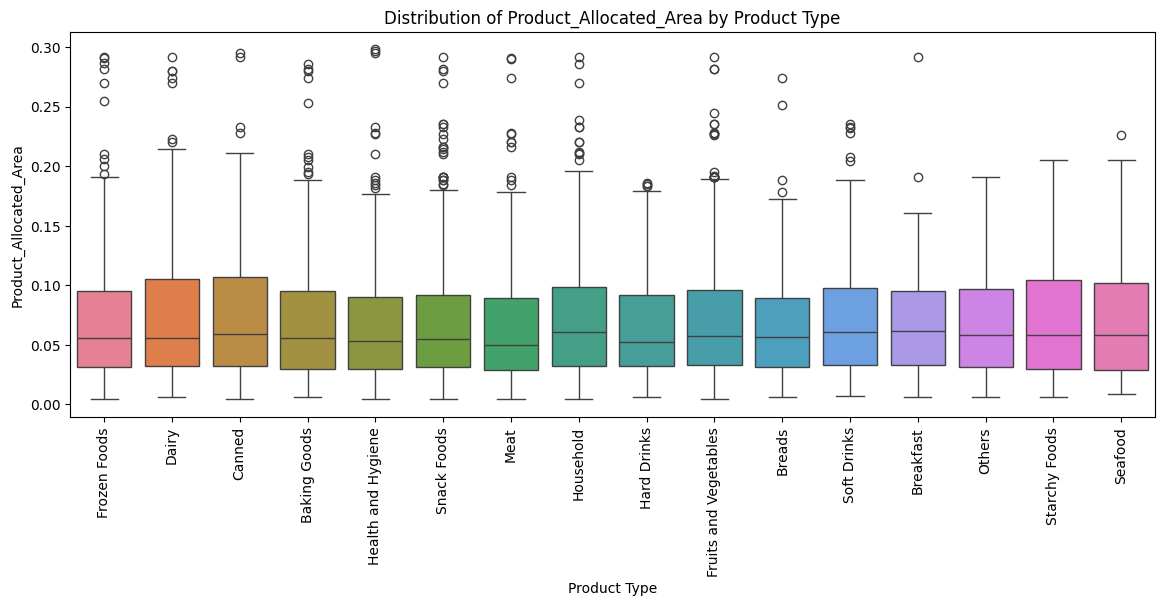

In [43]:
#Plotting the distribution of Product_Allocated_Area v. Product_Type
type_vs_boxplot('Product_Allocated_Area')

* There are a great number of outliers within this distribution. Let's try to isolate the items with larger allocated areas.

In [44]:
# Isolating the items with Product_Allocated_Area of > 0.225
area_isolation_df = data[data['Product_Allocated_Area'] > 0.225]
area_isolation_df.shape

(63, 12)

* There are 63 products with allocated space of larger than .225. Let's compare those items' statistical summary to the statistical summary without those items.

In [45]:
area_isolation_df.describe()

Product_Weight  Product_Allocated_Area  Product_MRP  \
count       63.000000               63.000000    63.000000   
mean        12.844762                0.260984   144.137619   
std          2.101874                0.026758    28.943195   
min          7.120000                0.226000    77.760000   
25%         11.365000                0.233000   125.220000   
50%         12.980000                0.270000   145.070000   
75%         14.485000                0.286000   163.190000   
max         16.900000                0.298000   205.120000   

       Store_Establishment_Year  Product_Store_Sales_Total  
count                 63.000000                  63.000000  
mean                2002.031746                3425.916667  
std                    8.339506                 965.790091  
min                 1987.000000                1132.860000  
25%                 1998.000000                2913.080000  
50%                 2009.000000                3321.030000  
75%                 2009.000000                4148.760000  
max                 2009.000000                5734.920000

In [46]:
data[data['Product_Allocated_Area'] < 0.225].describe()

Product_Weight  Product_Allocated_Area  Product_MRP  \
count     8700.000000             8700.000000  8700.000000   
mean        12.652409                0.067395   147.053502   
std          2.218189                0.045452    30.706999   
min          4.000000                0.004000    31.000000   
25%         11.147500                0.031000   126.207500   
50%         12.655000                0.055000   146.740000   
75%         14.170000                0.094000   167.592500   
max         22.000000                0.223000   266.000000   

       Store_Establishment_Year  Product_Store_Sales_Total  
count               8700.000000                8700.000000  
mean                2002.032759                3464.279443  
std                    8.389211                1066.364780  
min                 1987.000000                  33.000000  
25%                 1998.000000                2760.052500  
50%                 2009.000000                3453.035000  
75%                 2009.000000                4145.017500  
max                 2009.000000                8000.000000

* There doesn't seem to be much difference in the sales performance of the items given much more space than those with less space other than the minimum value of Product MRP and Product Store Sales Total being drastically higher in items with more space.
* Let's see if there is any relationship between Product_MRP and Allocation Area

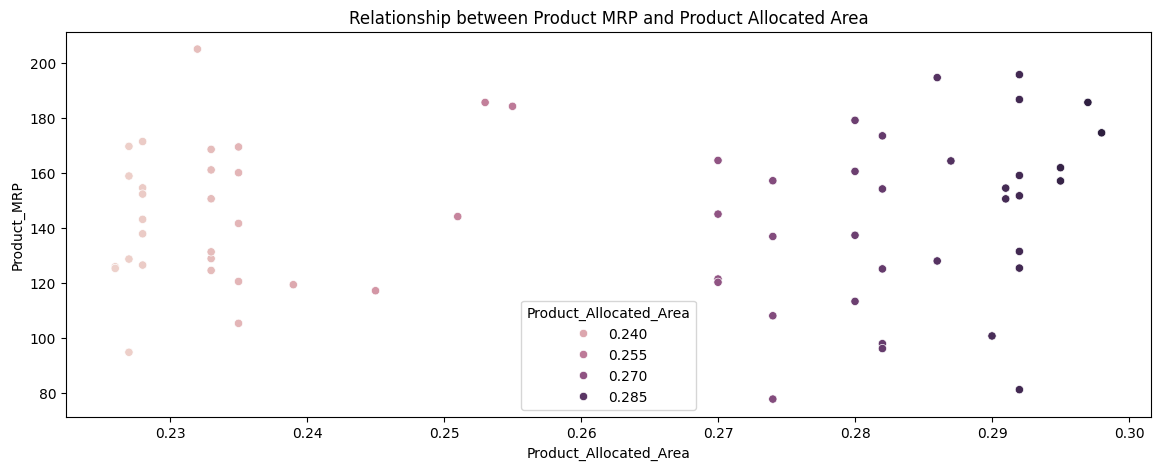

In [47]:
# Plotting the Product_MSP of High Space Allocation Items
plt.figure(figsize=(14, 5))
sns.scatterplot(data=area_isolation_df, x='Product_Allocated_Area', y='Product_MRP', hue='Product_Allocated_Area')
plt.title('Relationship between Product MRP and Product Allocated Area')
plt.show()

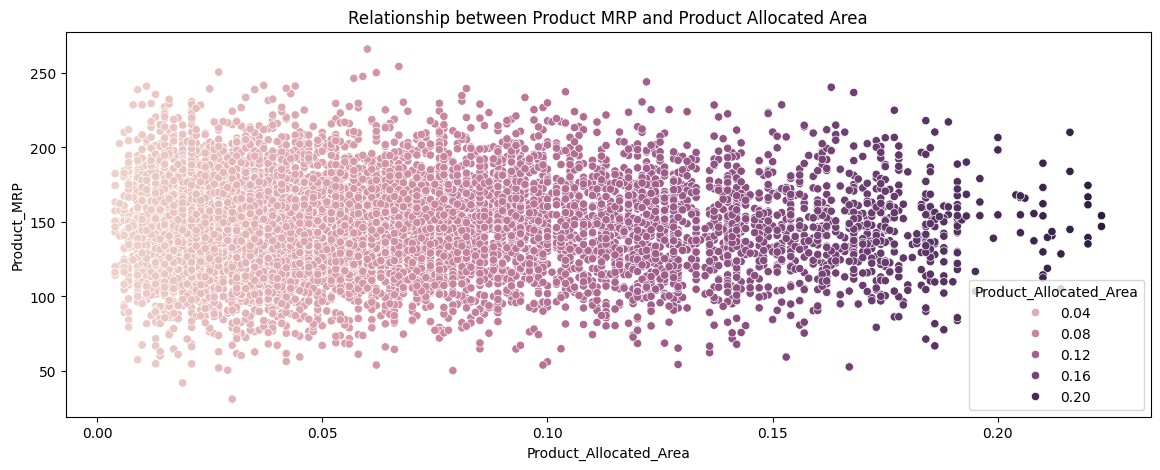

In [48]:
# Plotting the Product_MRP of Low Space Allocation Items
plt.figure(figsize=(14, 5))
sns.scatterplot(data=data[data['Product_Allocated_Area'] < 0.225], x='Product_Allocated_Area', y='Product_MRP', hue='Product_Allocated_Area')
plt.title('Relationship between Product MRP and Product Allocated Area')
plt.show()

* Nothing really jumping out at me here. Let's try looking at the number of transactions of items with high allocation space to determine if these are highly transactional items that sell high volume.

In [49]:
# Creating a dataframe to show the difference between the transaction totals in the different Product_Allocation_Area values
sales_ratio_df = pd.DataFrame()
sales_ratio_df['Transactions'] = data['Product_Store_Sales_Total'] / data['Product_MRP']
sales_ratio_df['Allocation_Area'] = data['Product_Allocated_Area']
sales_ratio_df['Allocation_Area'] = sales_ratio_df['Allocation_Area'].apply(lambda x: 'High' if x > 0.225 else 'Low')
sales_ratio_df.head()

Transactions Allocation_Area
0     24.277417             Low
1     28.174882             Low
2     25.482231             Low
3     22.179056             Low
4     18.430986             Low

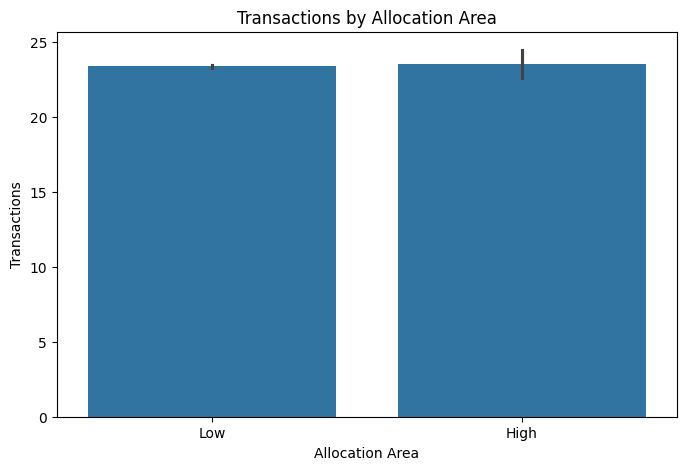

In [50]:
# Plotting the transactions by Allocation Area
plt.figure(figsize=(8, 5))
sns.barplot(x='Allocation_Area', y='Transactions', data=sales_ratio_df)
plt.title('Transactions by Allocation Area')
plt.xlabel('Allocation Area')
plt.ylabel('Transactions')
plt.show()

* This variable is so completely noisy that I'm led to believe there may be something off. If Product_Allocation_Area is a percentage of store space, then all of the sum of all Product_Allocation_Areas by store should equal 1. Let's check.

In [51]:
# Calculating the sum of Product_Allocated_Area by Store_Id
data.groupby('Store_Id')['Product_Allocated_Area'].sum()

Store_Id
OUT001    109.066
OUT002     78.045
OUT003     92.591
OUT004    323.073
Name: Product_Allocated_Area, dtype: float64

* AHA! These values are not correct. They also don't align with the store sizes either. OUT001 is a "high" size store, OUT002 is a "small" size store, OUT003 and OUT004 are both "medium" size stores, but the allocation areas neither sum up to one or reflect the size difference of the stores. To experiment, we may scale these values to see what effect it has on our model score. For now, let's create a category of these scaled values.

In [52]:
# Creating a new variable - "Scaled_Product_Allocation" that divides the current "Product_Allocated_Area" by the sums
data['Scaled_Product_Allocation'] = data['Product_Allocated_Area'] / data.groupby('Store_Id')['Product_Allocated_Area'].transform('sum')

In [53]:
# Checking that the sum of 'Scaled_Product_Allocation' grouped by store = 1
data.groupby('Store_Id')['Scaled_Product_Allocation'].sum()

Store_Id
OUT001    1.0
OUT002    1.0
OUT003    1.0
OUT004    1.0
Name: Scaled_Product_Allocation, dtype: float64

* Perfect. Now let's plot some of this new category to see if we can derive any insights.

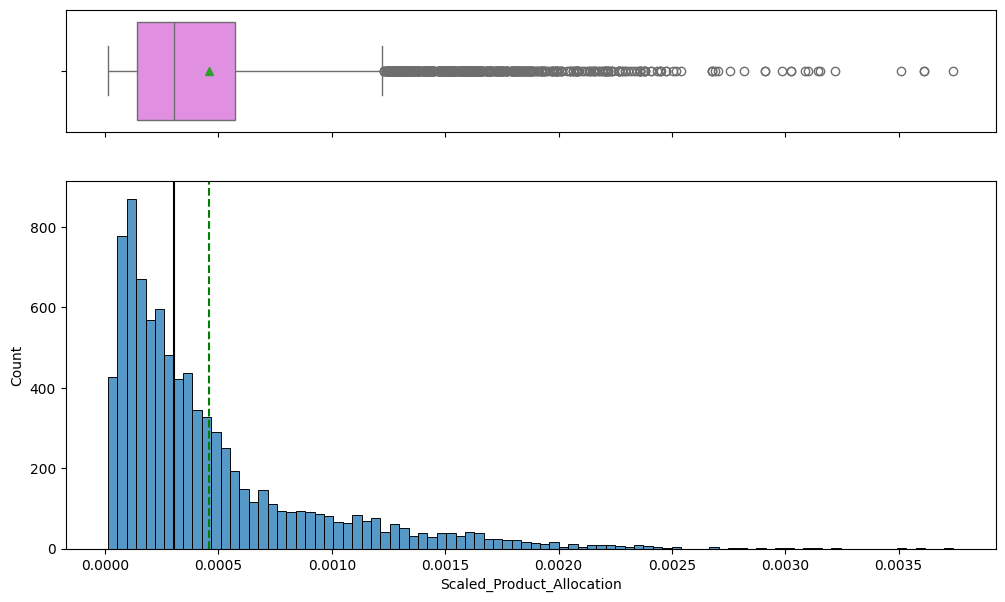

In [54]:
# Plotting the distribution of 'Scaled_Product_Allocation'
histogram_boxplot(data, "Scaled_Product_Allocation")

* This new variable's distribution is obviously similar to the original distribution of Product_Allocated_Area, but doesn't seem as noisy and has a smoother distribution curve that may help our model make better sense of it. We'll experiment with it later.

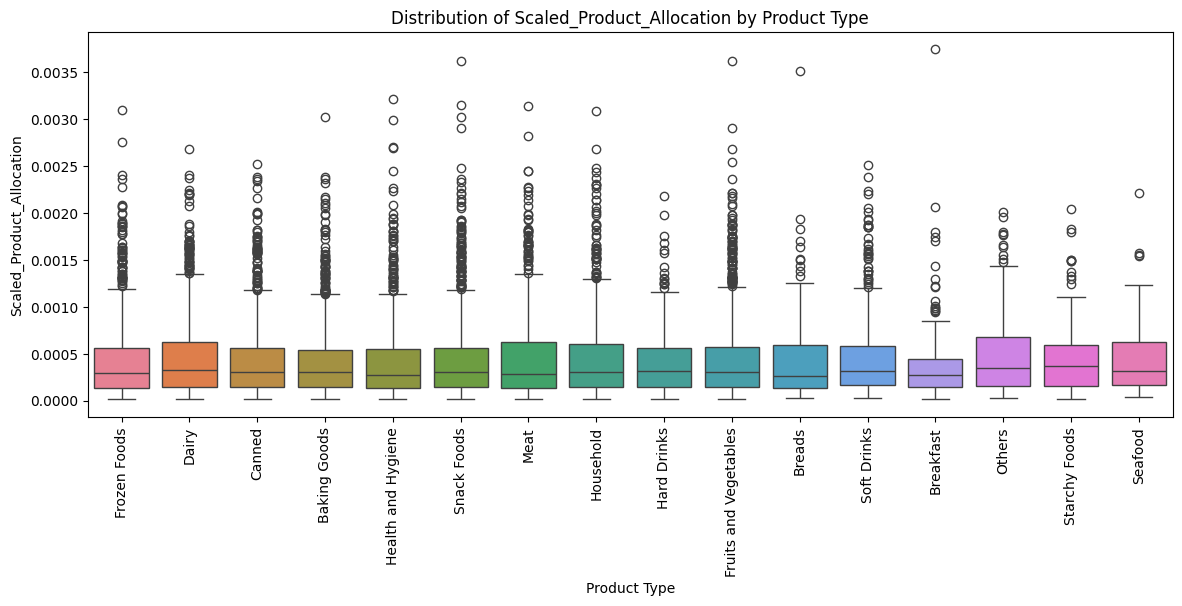

In [55]:
# Plotting 'Scaled Product Allocation' wrt. Product Type
type_vs_boxplot('Scaled_Product_Allocation')

* Scaling it has produced WAY more outliers, but I'm hoping that since we're going with various decision trees for our models that they will be robust against these outliers.

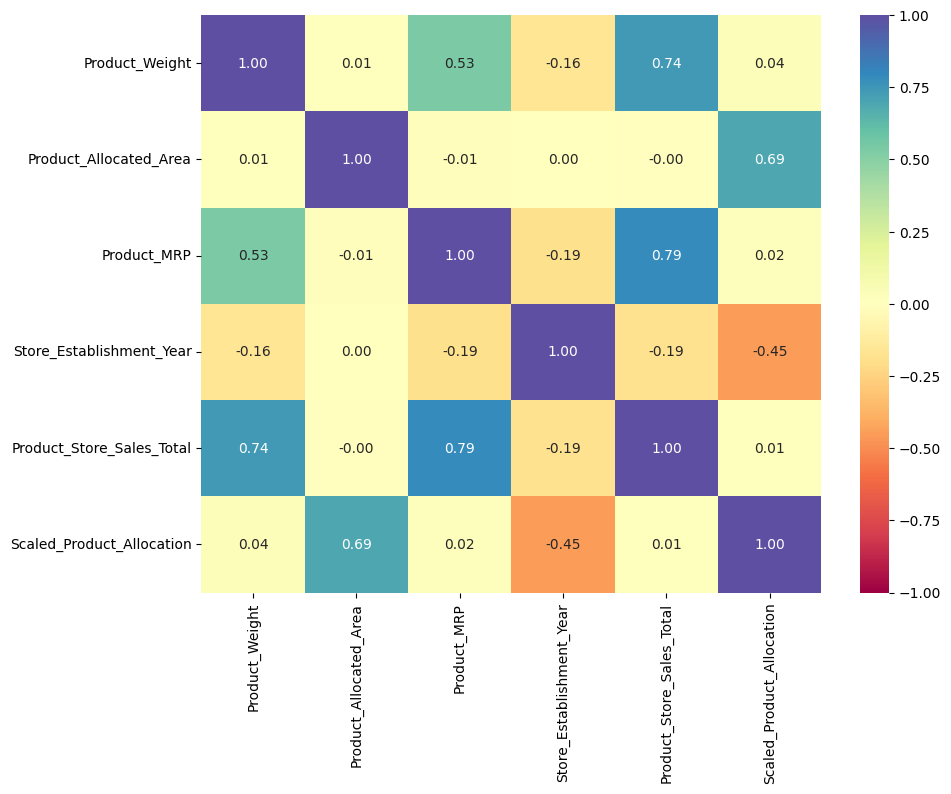

In [56]:
# Let's check for correlations with our new variable
# Adding my numeric variables to a list
num_vars = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Plotting the heatmap
plt.figure(figsize=(10, 7.5))
sns.heatmap(data[num_vars].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Obviously, since we scaled the Allocated Area by store, it produced some correlation to store age, since the store age is specific to each store.

#### Product_Weight wrt. Product_Sugar_Content

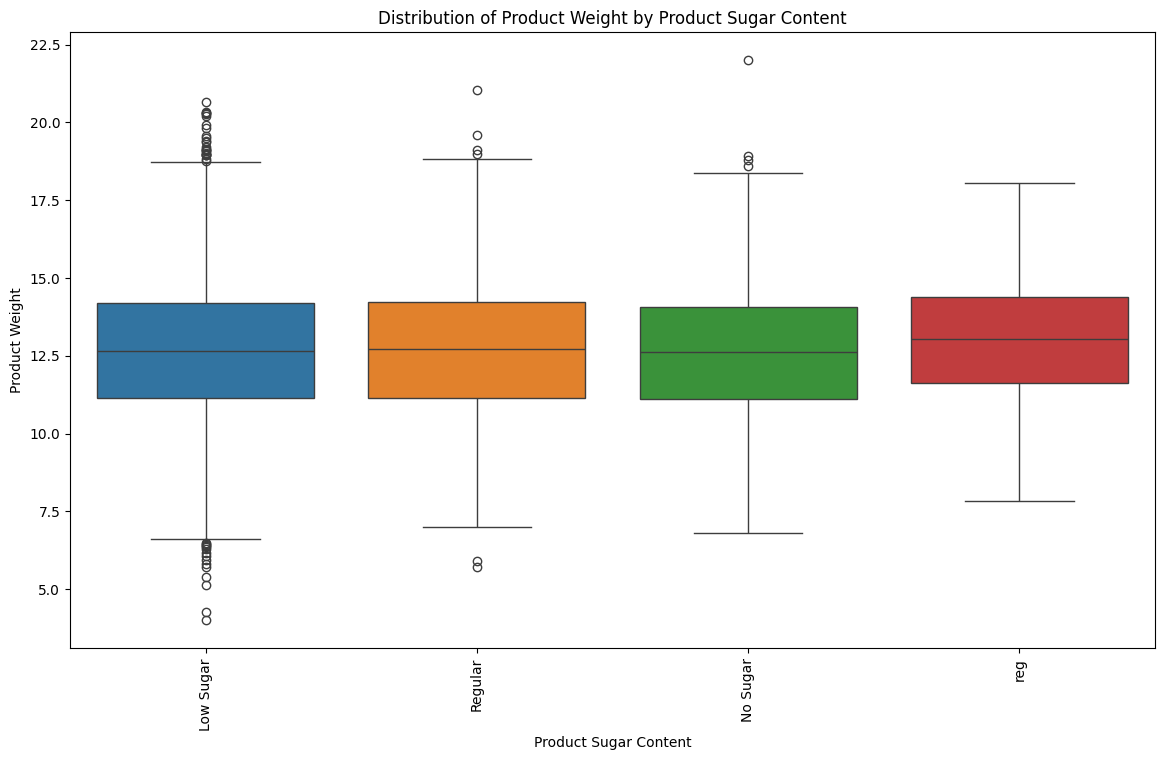

In [57]:
# Plotting the distribution Product_Weight wrt. Product_Sugar_Content
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='Product_Sugar_Content', y='Product_Weight', hue='Product_Sugar_Content')
plt.xticks(rotation=90)
plt.title('Distribution of Product Weight by Product Sugar Content')
plt.xlabel('Product Sugar Content')
plt.ylabel('Product Weight')
plt.show()

* Nothing remarkable jumping out here as the distribution of product weight is fairly similar among the different sugar contents.

#### Product_MRP by Product_Weight

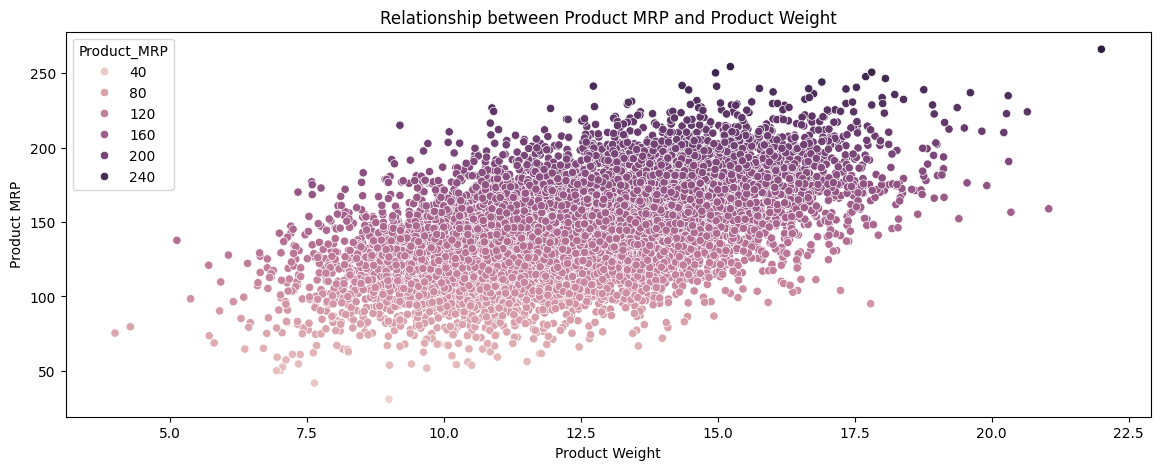

In [58]:
# Plotting the relationship between Product_MRP and Product_Weight
plt.figure(figsize=(14, 5))
sns.scatterplot(data=data, x='Product_Weight', y='Product_MRP', hue='Product_MRP')
plt.title('Relationship between Product MRP and Product Weight')
plt.xlabel('Product Weight')
plt.ylabel('Product MRP')
plt.show()

* We can see a positive linear relationship here, but it's not surprising since we know that Product_Store_Sales_Total and Product_Weight are also positively related.

#### Product_Type by Product_Sugar_Content

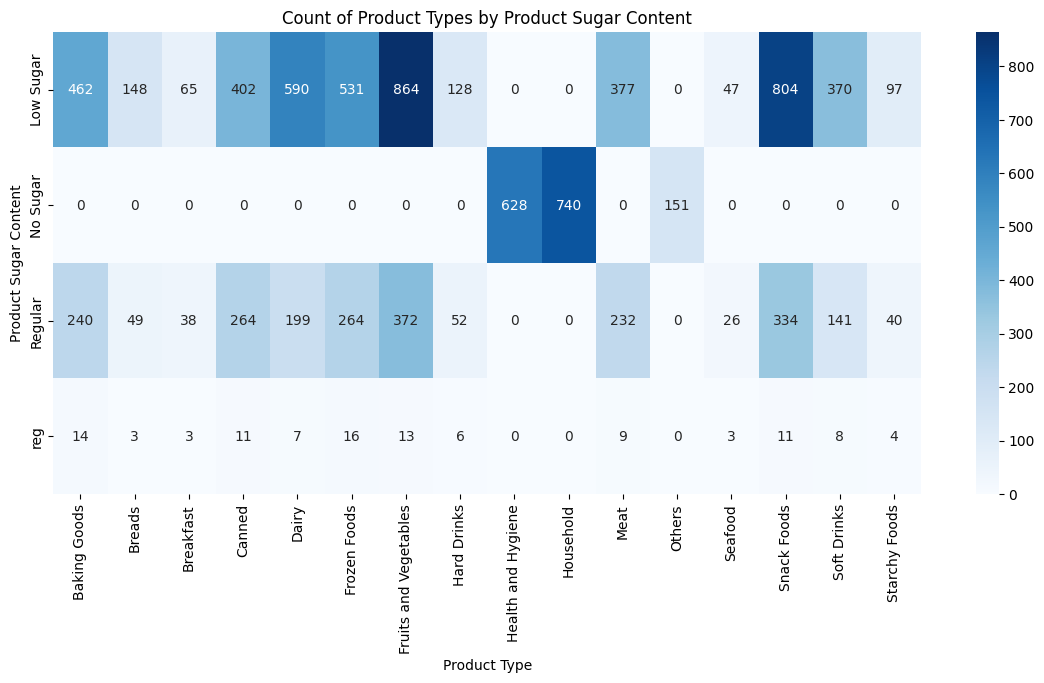

In [59]:
# Plotting the count of Product_Types by each Product_Sugar_Content category
plt.figure(figsize=(14, 6))
sns.heatmap(pd.crosstab(data['Product_Sugar_Content'], data['Product_Type']), annot=True, fmt='d', cmap='Blues')
plt.title('Count of Product Types by Product Sugar Content')
plt.xlabel('Product Type')
plt.ylabel('Product Sugar Content')
plt.show()

* Not surprising that Health and Hygeine, Household, and Others are the only contributors to the 'No Sugar' category.
* I find it surprising that Snack Foods has so many Low Sugar items when they are notorious for high sugar content.
* However, this does explain why Low Sugar was the highest contributor to product sales as well as Fruits and Vegetables and Snack Foods being high contributors when they are all aligned.
* Also of note, it seems quite obvious that "Regular" and "reg" are the same category as they share null values and similar value ratios for each category, but "reg" is much smaller. We'll combine these two later on in Data Preprocessing.

#### Product_Type by Store_Id

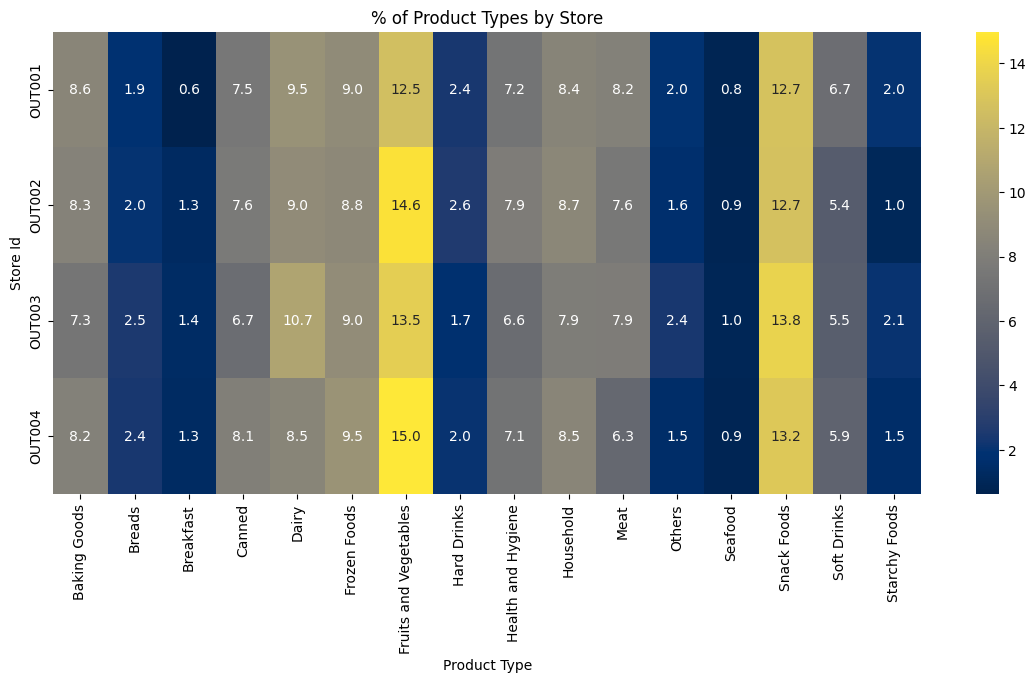

In [60]:
# Plotting the count of Product_Types sold in each Store_Id

#Computing the percentages
cross_tab = pd.crosstab(data['Store_Id'], data['Product_Type'], normalize='index') * 100

# Plotting the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(cross_tab, annot=True, fmt='.1f', cmap='cividis')
plt.title('% of Product Types by Store')
plt.xlabel('Product Type')
plt.ylabel('Store Id')
plt.show()

* Again, Fruits and Vegetables and Snack Foods are the highest two categories for all store types.
* Interesting to note that the best performing store (OUT004) sells the lowest ratio of dairy to other products.

#### Product_Type wrt. Product_MRP

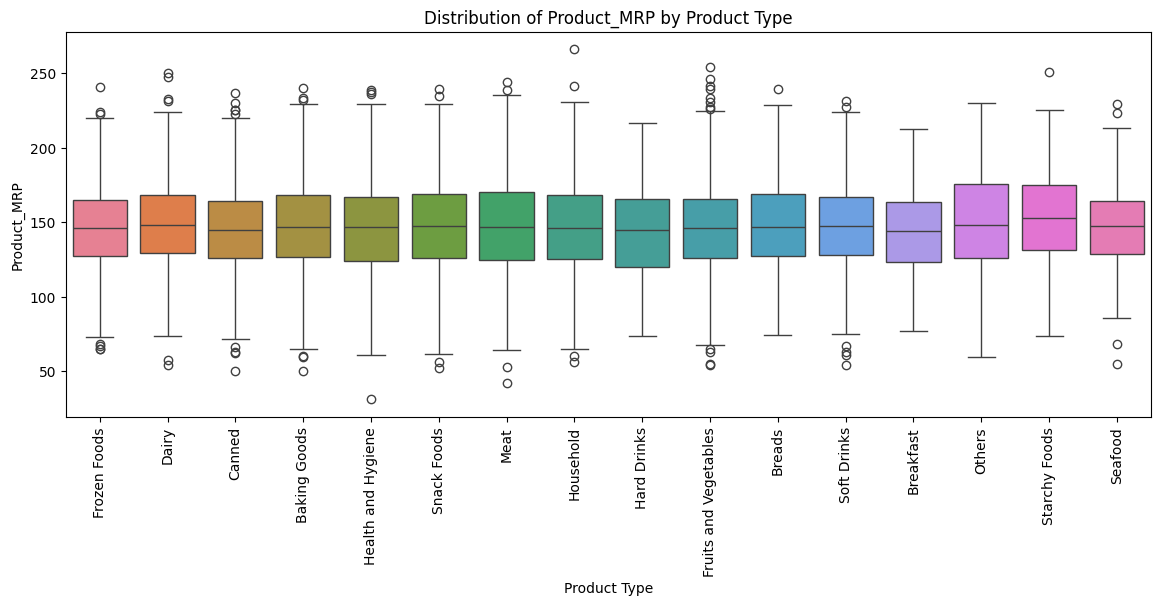

In [61]:
# Plotting the distribution of Product_MRP wrt. Product_Type
type_vs_boxplot('Product_MRP')

* Starchy foods seem to have the highest median Product_MRP
* Meat shows the highest 75% range of Product_MRP
* Household has the highest outlier by Product_MRP that we isolated earlier

#### Product_MRP by Store_Id

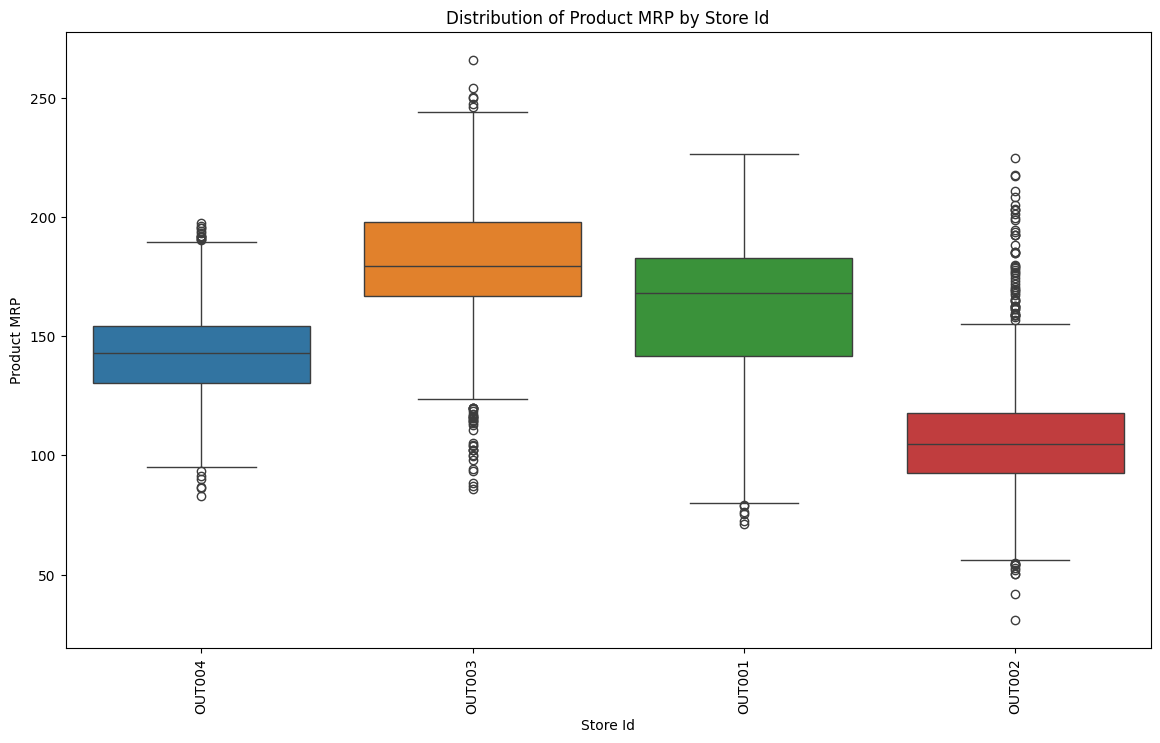

In [62]:
# Plotting the Product_MRP by Store_Id
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='Store_Id', y='Product_MRP', hue='Store_Id')
plt.xticks(rotation=90)
plt.title('Distribution of Product MRP by Store Id')
plt.xlabel('Store Id')
plt.ylabel('Product MRP')
plt.show()

* This is informative! OUT003 has the highest Product_MRP, followed by OUT001, OUT004, and OUT002.
* While the order of OUT003, OUT001, and OUT002 aligns with their overall contributions to Product_Store_Sales_Total, OUT004 is much lower than I would have expected given that they are the top contributor to Product_Store_Sales_Total.
* This could be a function of their locations or may have other contributing factors. Let's take a look.

### Store Deep Dive

#### OUT001 Deep Dive

In [63]:
# Getting the statistical summary for OUT001
data.loc[data['Store_Id'] == 'OUT001'].describe(include='all')

Product_Id  Product_Weight Product_Sugar_Content  \
count        1586     1586.000000                  1586   
unique       1586             NaN                     4   
top        NC7187             NaN             Low Sugar   
freq            1             NaN                   845   
mean          NaN       13.458865                   NaN   
std           NaN        2.064975                   NaN   
min           NaN        6.160000                   NaN   
25%           NaN       12.052500                   NaN   
50%           NaN       13.960000                   NaN   
75%           NaN       14.950000                   NaN   
max           NaN       17.970000                   NaN   

        Product_Allocated_Area Product_Type  Product_MRP Store_Id  \
count              1586.000000         1586  1586.000000     1586   
unique                     NaN           16          NaN        1   
top                        NaN  Snack Foods          NaN   OUT001   
freq                       NaN          202          NaN     1586   
mean                  0.068768          NaN   160.514054      NaN   
std                   0.047131          NaN    30.359059      NaN   
min                   0.004000          NaN    71.350000      NaN   
25%                   0.033000          NaN   141.720000      NaN   
50%                   0.056500          NaN   168.320000      NaN   
75%                   0.094000          NaN   182.937500      NaN   
max                   0.295000          NaN   226.590000      NaN   

        Store_Establishment_Year Store_Size Store_Location_City_Type  \
count                     1586.0       1586                     1586   
unique                       NaN          1                        1   
top                          NaN       High                   Tier 2   
freq                         NaN       1586                     1586   
mean                      1987.0        NaN                      NaN   
std                          0.0        NaN                      NaN   
min                       1987.0        NaN                      NaN   
25%                       1987.0        NaN                      NaN   
50%                       1987.0        NaN                      NaN   
75%                       1987.0        NaN                      NaN   
max                       1987.0        NaN                      NaN   

               Store_Type  Product_Store_Sales_Total  \
count                1586                1586.000000   
unique                  1                        NaN   
top     Supermarket Type1                        NaN   
freq                 1586                        NaN   
mean                  NaN                3923.778802   
std                   NaN                 904.629010   
min                   NaN                2300.560000   
25%                   NaN                3285.510000   
50%                   NaN                4139.645000   
75%                   NaN                4639.400000   
max                   NaN                4997.630000   

        Scaled_Product_Allocation  
count                 1586.000000  
unique                        NaN  
top                           NaN  
freq                          NaN  
mean                     0.000631  
std                      0.000432  
min                      0.000037  
25%                      0.000303  
50%                      0.000518  
75%                      0.000862  
max                      0.002705

* OUT001 carries a total of 1586 products with Snack Foods being the most common item carried and an average Product_MRP of 160.5, with prices ranging from 71 to 226.
* It is their oldest store and largest, built in 1987, and is a high-sized, Supermarket Type1 store located in a Tier 2 city.
* Product revenue ranges from 2300 to 4997 with an average product revenue of ~3923.

In [64]:
# Calculating total sales from OUT001
OUT001_Total_Sales = data.loc[data['Store_Id'] == 'OUT001']['Product_Store_Sales_Total'].sum()
print(OUT001_Total_Sales)

6223113.18


* OUT001 contributed 6.2M in total sales

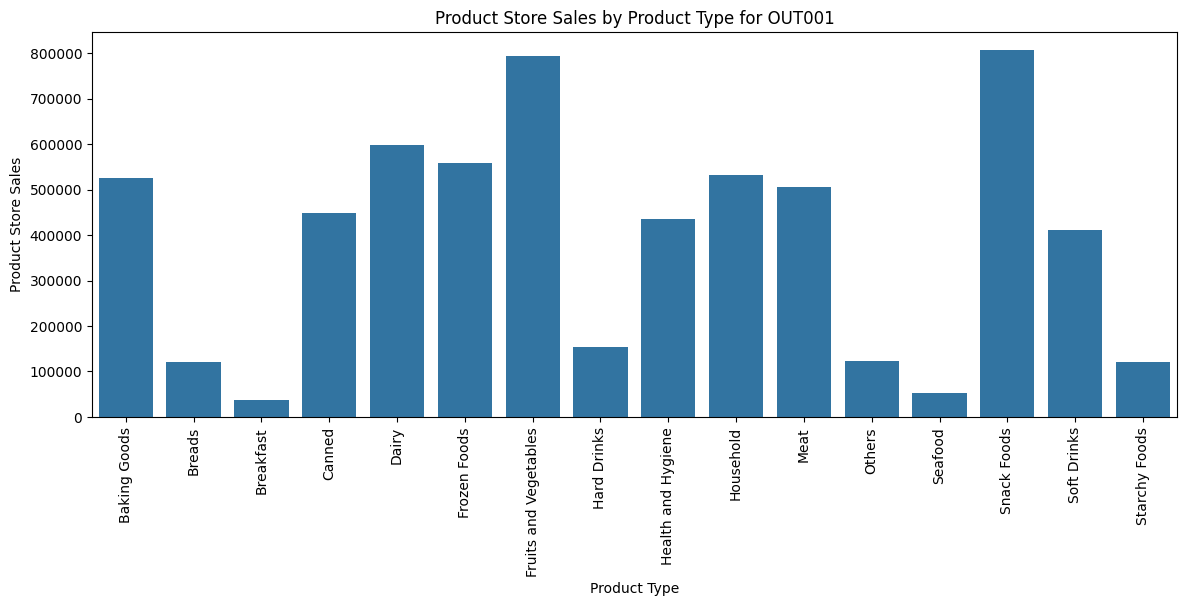

In [65]:
# Plotting Product_Store_Sales by Product_Type for store OUT001
OUT001_df = (data.loc[data['Store_Id'] == 'OUT001'].groupby(['Product_Type'], as_index=False)['Product_Store_Sales_Total'].sum())
plt.figure(figsize=(14, 5))
sns.barplot(data=OUT001_df, x='Product_Type', y='Product_Store_Sales_Total')
plt.xticks(rotation=90)
plt.title('Product Store Sales by Product Type for OUT001')
plt.xlabel('Product Type')
plt.ylabel('Product Store Sales')
plt.show()

* OUT001 gets the most revenue from Fruits and Vegetables and Snack Foods (in line with the total dataset). Both contribute around 800,000 revenue each.
* OUT001 struggles with Breakfast and Seafood categories, neither topping 100,000 in revenue.

#### OUT002 Deep Dive

In [66]:
# Getting the statistical summary for OUT002
data.loc[data['Store_Id'] == 'OUT002'].describe(include='all')

Product_Id  Product_Weight Product_Sugar_Content  \
count        1152     1152.000000                  1152   
unique       1152             NaN                     4   
top        NC2769             NaN             Low Sugar   
freq            1             NaN                   658   
mean          NaN        9.911241                   NaN   
std           NaN        1.799846                   NaN   
min           NaN        4.000000                   NaN   
25%           NaN        8.767500                   NaN   
50%           NaN        9.795000                   NaN   
75%           NaN       10.890000                   NaN   
max           NaN       19.820000                   NaN   

        Product_Allocated_Area           Product_Type  Product_MRP Store_Id  \
count              1152.000000                   1152  1152.000000     1152   
unique                     NaN                     16          NaN        1   
top                        NaN  Fruits and Vegetables          NaN   OUT002   
freq                       NaN                    168          NaN     1152   
mean                  0.067747                    NaN   107.080634      NaN   
std                   0.047567                    NaN    24.912333      NaN   
min                   0.006000                    NaN    31.000000      NaN   
25%                   0.031000                    NaN    92.827500      NaN   
50%                   0.054500                    NaN   104.675000      NaN   
75%                   0.095250                    NaN   117.817500      NaN   
max                   0.292000                    NaN   224.930000      NaN   

        Store_Establishment_Year Store_Size Store_Location_City_Type  \
count                     1152.0       1152                     1152   
unique                       NaN          1                        1   
top                          NaN      Small                   Tier 3   
freq                         NaN       1152                     1152   
mean                      1998.0        NaN                      NaN   
std                          0.0        NaN                      NaN   
min                       1998.0        NaN                      NaN   
25%                       1998.0        NaN                      NaN   
50%                       1998.0        NaN                      NaN   
75%                       1998.0        NaN                      NaN   
max                       1998.0        NaN                      NaN   

       Store_Type  Product_Store_Sales_Total  Scaled_Product_Allocation  
count        1152                1152.000000                1152.000000  
unique          1                        NaN                        NaN  
top     Food Mart                        NaN                        NaN  
freq         1152                        NaN                        NaN  
mean          NaN                1762.942465                   0.000868  
std           NaN                 462.862431                   0.000609  
min           NaN                  33.000000                   0.000077  
25%           NaN                1495.472500                   0.000397  
50%           NaN                1889.495000                   0.000698  
75%           NaN                2133.622500                   0.001220  
max           NaN                2299.630000                   0.003741

* OUT002 carries a total of 1152 products with Fruits and Vegetables being the most common item carried and an average Product_MRP of 107, with prices ranging from 31 to 224.
* It is their second oldest and smallest store, built in 1998, and is a small-sized, Food Mart in a Tier 3 city (which explains why it is the poorest performing store).
* Product revenue ranges from 33 to 2299 with an average product revenue of ~1762.

In [67]:
# Calculation OUT002 sales total
OUT002_Total_Sales = data.loc[data['Store_Id'] == 'OUT002']['Product_Store_Sales_Total'].sum()
print(OUT002_Total_Sales)

2030909.72


* OUT002 contributed 2.0M in total sales

While we're at it, let's find out what that minimum priced item is that only contributed 33 to OUT002 Product_Store_Sales_Total

In [68]:
data.loc[data['Product_MRP'] == 31]

Product_Id  Product_Weight Product_Sugar_Content  Product_Allocated_Area  \
4561     NC7411             9.0              No Sugar                    0.03   

            Product_Type  Product_MRP Store_Id  Store_Establishment_Year  \
4561  Health and Hygiene         31.0   OUT002                      1998   

     Store_Size Store_Location_City_Type Store_Type  \
4561      Small                   Tier 3  Food Mart   

      Product_Store_Sales_Total  Scaled_Product_Allocation  
4561                     253.53                   0.000384

* Okay, that's weird. I would have sworn this was the item that only contributed to a Product_Store_Sales_Total of 33. Let's find that particular product.

In [69]:
data.loc[data['Product_Store_Sales_Total'] == 33]

Product_Id  Product_Weight Product_Sugar_Content  Product_Allocated_Area  \
6529     FD1321             4.0             Low Sugar                   0.077   

     Product_Type  Product_MRP Store_Id  Store_Establishment_Year Store_Size  \
6529  Snack Foods        75.44   OUT002                      1998      Small   

     Store_Location_City_Type Store_Type  Product_Store_Sales_Total  \
6529                   Tier 3  Food Mart                       33.0   

      Scaled_Product_Allocation  
6529                   0.000987

* It's not surprising that the lowest contributing product is in store OUT002. If the Product_MRP is 75.44, but it only contributed to 33 in Product_Store_Sales_Total, they must have had to sell it on clearance or had returns on the product. Hopefully, we're no longer selling it at this location.
* Learning from our "power item" investigation, let's see if there are other items in the dataset in which the Store Sales Total is less than the Product_MSRP.

In [70]:
# Creating a dataframe of products in which Product_Store_Sales_Total is less than Product_MSRP
return_risk_df = data[data['Product_Store_Sales_Total'] < data['Product_MRP']]
return_risk_df


Product_Id  Product_Weight Product_Sugar_Content  Product_Allocated_Area  \
6529     FD1321             4.0             Low Sugar                   0.077   

     Product_Type  Product_MRP Store_Id  Store_Establishment_Year Store_Size  \
6529  Snack Foods        75.44   OUT002                      1998      Small   

     Store_Location_City_Type Store_Type  Product_Store_Sales_Total  \
6529                   Tier 3  Food Mart                       33.0   

      Scaled_Product_Allocation  
6529                   0.000987

* It seems this is probably either a typo or an extreme outlier. Let's drop it from the dataset in Outlier Detection.

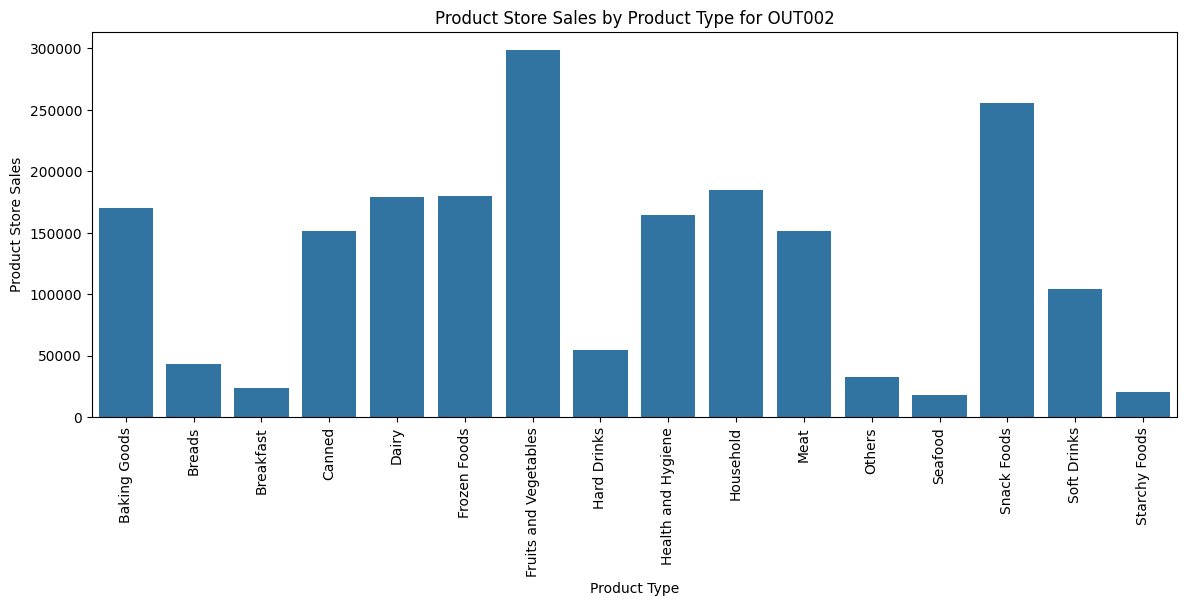

In [71]:
# Plotting Product_Store_Sales by Product_Type for store OUT002
OUT002_df = (data.loc[data['Store_Id'] == 'OUT002'].groupby(['Product_Type'], as_index=False)['Product_Store_Sales_Total'].sum())
plt.figure(figsize=(14, 5))
sns.barplot(data=OUT002_df, x='Product_Type', y='Product_Store_Sales_Total')
plt.xticks(rotation=90)
plt.title('Product Store Sales by Product Type for OUT002')
plt.xlabel('Product Type')
plt.ylabel('Product Store Sales')
plt.show()

* Also in line with the total dataset, OUT002 gets most of its revenue from Fruits and Vegetables and Snack Foods, but at much lower revenues of ~300,000 and ~250,000 respectively.
* OUT002 struggles with Breads, Breakfast, Others, Seafood, and Starchy Foods - none topping 50,000 in revenue.

#### OUT003 Deep Dive

In [72]:
# Getting the statistical summary for OUT003
data.loc[data['Store_Id'] == 'OUT003'].describe(include='all')

Product_Id  Product_Weight Product_Sugar_Content  \
count        1349     1349.000000                  1349   
unique       1349             NaN                     4   
top         NC522             NaN             Low Sugar   
freq            1             NaN                   750   
mean          NaN       15.103692                   NaN   
std           NaN        1.893531                   NaN   
min           NaN        7.350000                   NaN   
25%           NaN       14.020000                   NaN   
50%           NaN       15.180000                   NaN   
75%           NaN       16.350000                   NaN   
max           NaN       22.000000                   NaN   

        Product_Allocated_Area Product_Type  Product_MRP Store_Id  \
count              1349.000000         1349  1349.000000     1349   
unique                     NaN           16          NaN        1   
top                        NaN  Snack Foods          NaN   OUT003   
freq                       NaN          186          NaN     1349   
mean                  0.068637          NaN   181.358725      NaN   
std                   0.048708          NaN    24.796429      NaN   
min                   0.004000          NaN    85.880000      NaN   
25%                   0.031000          NaN   166.920000      NaN   
50%                   0.057000          NaN   179.670000      NaN   
75%                   0.094000          NaN   198.070000      NaN   
max                   0.298000          NaN   266.000000      NaN   

        Store_Establishment_Year Store_Size Store_Location_City_Type  \
count                     1349.0       1349                     1349   
unique                       NaN          1                        1   
top                          NaN     Medium                   Tier 1   
freq                         NaN       1349                     1349   
mean                      1999.0        NaN                      NaN   
std                          0.0        NaN                      NaN   
min                       1999.0        NaN                      NaN   
25%                       1999.0        NaN                      NaN   
50%                       1999.0        NaN                      NaN   
75%                       1999.0        NaN                      NaN   
max                       1999.0        NaN                      NaN   

                Store_Type  Product_Store_Sales_Total  \
count                 1349                1349.000000   
unique                   1                        NaN   
top     Departmental Store                        NaN   
freq                  1349                        NaN   
mean                   NaN                4946.966323   
std                    NaN                 677.539953   
min                    NaN                3069.240000   
25%                    NaN                4355.390000   
50%                    NaN                4958.290000   
75%                    NaN                5366.590000   
max                    NaN                8000.000000   

        Scaled_Product_Allocation  
count                 1349.000000  
unique                        NaN  
top                           NaN  
freq                          NaN  
mean                     0.000741  
std                      0.000526  
min                      0.000043  
25%                      0.000335  
50%                      0.000616  
75%                      0.001015  
max                      0.003218

* OUT003 carries a total of 1349 products with Snack Foods being the most common and an average Product_MRP of 181 and prices ranging from 85 to 266.
* It is their second newest store, built in 1999, and is a medium-sized, Departmental Store in a Tier 1 city.
* Product revenue ranges from 3069 to 8000 with an average product revenue of 4946. This is a marked difference from their other stores.
* It should be noted that this is their highest priced store.

In [73]:
# Calculating the total sales of OUT003
OUT003_Total_Sales = data.loc[data['Store_Id'] == 'OUT003']['Product_Store_Sales_Total'].sum()
print(OUT003_Total_Sales)

6673457.57


* OUT003 contributed 6.6M to total sales

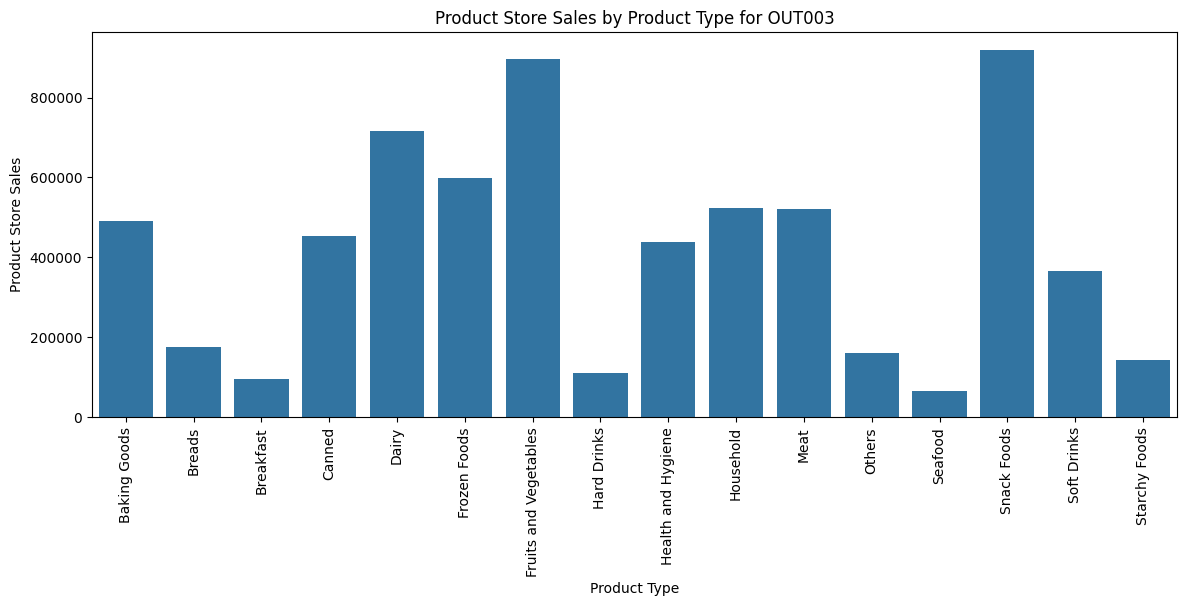

In [74]:
# Plotting Product_Store_Sales by Product_Type for store OUT003
OUT003_df = (data.loc[data['Store_Id'] == 'OUT003'].groupby(['Product_Type'], as_index=False)['Product_Store_Sales_Total'].sum())
plt.figure(figsize=(14, 5))
sns.barplot(data=OUT003_df, x='Product_Type', y='Product_Store_Sales_Total')
plt.xticks(rotation=90)
plt.title('Product Store Sales by Product Type for OUT003')
plt.xlabel('Product Type')
plt.ylabel('Product Store Sales')
plt.show()

* Fruits and Vegetables and Snack Foods are the highest contributors to OUT003 sales, but in this case, Snack Foods is the highest contributor rather than F&V's. Both contribute well over 800,000 each.
* Dairy performs a little better here than the other stores.
* Like the others, OUT003 struggles withe Breakfast and Seafood as the lowest two contributors.

#### OUT004 Deep Dive

In [75]:
# Getting the statistical summary for OUT004
data.loc[data['Store_Id'] == 'OUT004'].describe(include='all')

Product_Id  Product_Weight Product_Sugar_Content  \
count        4676     4676.000000                  4676   
unique       4676             NaN                     4   
top         NC584             NaN             Low Sugar   
freq            1             NaN                  2632   
mean          NaN       12.349613                   NaN   
std           NaN        1.428199                   NaN   
min           NaN        7.340000                   NaN   
25%           NaN       11.370000                   NaN   
50%           NaN       12.370000                   NaN   
75%           NaN       13.302500                   NaN   
max           NaN       17.790000                   NaN   

        Product_Allocated_Area           Product_Type  Product_MRP Store_Id  \
count              4676.000000                   4676  4676.000000     4676   
unique                     NaN                     16          NaN        1   
top                        NaN  Fruits and Vegetables          NaN   OUT004   
freq                       NaN                    700          NaN     4676   
mean                  0.069092                    NaN   142.399709      NaN   
std                   0.048584                    NaN    17.513973      NaN   
min                   0.004000                    NaN    83.040000      NaN   
25%                   0.031000                    NaN   130.540000      NaN   
50%                   0.056000                    NaN   142.820000      NaN   
75%                   0.097000                    NaN   154.192500      NaN   
max                   0.297000                    NaN   197.660000      NaN   

        Store_Establishment_Year Store_Size Store_Location_City_Type  \
count                     4676.0       4676                     4676   
unique                       NaN          1                        1   
top                          NaN     Medium                   Tier 2   
freq                         NaN       4676                     4676   
mean                      2009.0        NaN                      NaN   
std                          0.0        NaN                      NaN   
min                       2009.0        NaN                      NaN   
25%                       2009.0        NaN                      NaN   
50%                       2009.0        NaN                      NaN   
75%                       2009.0        NaN                      NaN   
max                       2009.0        NaN                      NaN   

               Store_Type  Product_Store_Sales_Total  \
count                4676                4676.000000   
unique                  1                        NaN   
top     Supermarket Type2                        NaN   
freq                 4676                        NaN   
mean                  NaN                3299.312111   
std                   NaN                 468.271692   
min                   NaN                1561.060000   
25%                   NaN                2942.085000   
50%                   NaN                3304.180000   
75%                   NaN                3646.907500   
max                   NaN                5462.860000   

        Scaled_Product_Allocation  
count                 4676.000000  
unique                        NaN  
top                           NaN  
freq                          NaN  
mean                     0.000214  
std                      0.000150  
min                      0.000012  
25%                      0.000096  
50%                      0.000173  
75%                      0.000300  
max                      0.000919

* OUT004 carries a total of 4676 products with Fruits and Vegetables being the most common with an average Product_MRP of 142 and prices ranging from 83 to 197.
* It is their newest store, built in 2009, and is a medium-sized, Supermarket Type 2 store in a Tier 2 city.
* Product Revenue ranges from 1561 to 5462 with an average product revenue of ~3300.
* It should be noted that this is their highest volume store.

In [76]:
# Calculating OUT004 total sales
OUT004_Total_Sales = data.loc[data['Store_Id'] == 'OUT004']['Product_Store_Sales_Total'].sum()
print(OUT004_Total_Sales)

15427583.43


* OUT004 contributed 15.4M to total sales

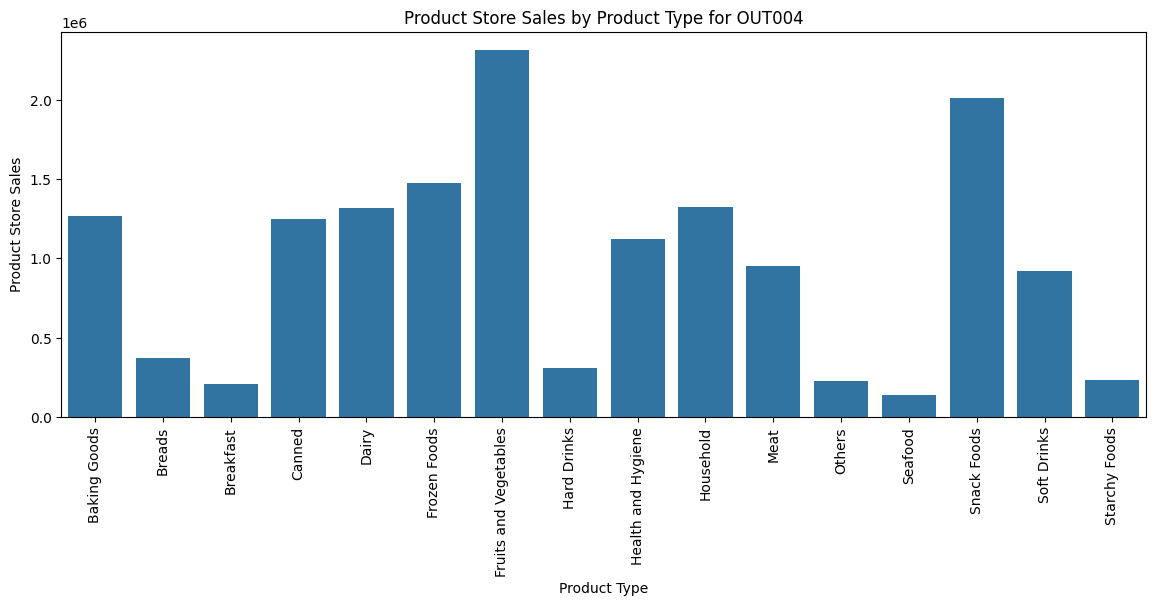

In [77]:
# Plotting Product_Store_Sales by Product_Type for store OUT004
OUT004_df = (data.loc[data['Store_Id'] == 'OUT004'].groupby(['Product_Type'], as_index=False)['Product_Store_Sales_Total'].sum())
plt.figure(figsize=(14, 5))
sns.barplot(data=OUT004_df, x='Product_Type', y='Product_Store_Sales_Total')
plt.xticks(rotation=90)
plt.title('Product Store Sales by Product Type for OUT004')
plt.xlabel('Product Type')
plt.ylabel('Product Store Sales')
plt.show()

* Like all of the others, Fruits and Vegetables and Snack Foods are the largest contributors here at close to or well of 2M each.
* Unlike the others, Frozen Foods is the third largest contributor rather than Dairy.
* OUT004 struggles with Breakfast, Others, and Seafood as the lowest contributors.

In [78]:
# Comparing the total sales by store
store_sales_df = pd.DataFrame([OUT001_Total_Sales, OUT002_Total_Sales, OUT003_Total_Sales, OUT004_Total_Sales], index=['OUT001', 'OUT002', 'OUT003', 'OUT004'], columns=['Product_Store_Sales_Total'])
store_sales_df

Product_Store_Sales_Total
OUT001                 6223113.18
OUT002                 2030909.72
OUT003                 6673457.57
OUT004                15427583.43

### City Tier Deep Dive

Since deep diving into the Store Id was so informative, let's do the same with City Tier.

#### Tier 1

In [79]:
data.loc[data['Store_Location_City_Type'] == 'Tier 1'].describe(include='all')

Product_Id  Product_Weight Product_Sugar_Content  \
count        1349     1349.000000                  1349   
unique       1349             NaN                     4   
top         NC522             NaN             Low Sugar   
freq            1             NaN                   750   
mean          NaN       15.103692                   NaN   
std           NaN        1.893531                   NaN   
min           NaN        7.350000                   NaN   
25%           NaN       14.020000                   NaN   
50%           NaN       15.180000                   NaN   
75%           NaN       16.350000                   NaN   
max           NaN       22.000000                   NaN   

        Product_Allocated_Area Product_Type  Product_MRP Store_Id  \
count              1349.000000         1349  1349.000000     1349   
unique                     NaN           16          NaN        1   
top                        NaN  Snack Foods          NaN   OUT003   
freq                       NaN          186          NaN     1349   
mean                  0.068637          NaN   181.358725      NaN   
std                   0.048708          NaN    24.796429      NaN   
min                   0.004000          NaN    85.880000      NaN   
25%                   0.031000          NaN   166.920000      NaN   
50%                   0.057000          NaN   179.670000      NaN   
75%                   0.094000          NaN   198.070000      NaN   
max                   0.298000          NaN   266.000000      NaN   

        Store_Establishment_Year Store_Size Store_Location_City_Type  \
count                     1349.0       1349                     1349   
unique                       NaN          1                        1   
top                          NaN     Medium                   Tier 1   
freq                         NaN       1349                     1349   
mean                      1999.0        NaN                      NaN   
std                          0.0        NaN                      NaN   
min                       1999.0        NaN                      NaN   
25%                       1999.0        NaN                      NaN   
50%                       1999.0        NaN                      NaN   
75%                       1999.0        NaN                      NaN   
max                       1999.0        NaN                      NaN   

                Store_Type  Product_Store_Sales_Total  \
count                 1349                1349.000000   
unique                   1                        NaN   
top     Departmental Store                        NaN   
freq                  1349                        NaN   
mean                   NaN                4946.966323   
std                    NaN                 677.539953   
min                    NaN                3069.240000   
25%                    NaN                4355.390000   
50%                    NaN                4958.290000   
75%                    NaN                5366.590000   
max                    NaN                8000.000000   

        Scaled_Product_Allocation  
count                 1349.000000  
unique                        NaN  
top                           NaN  
freq                          NaN  
mean                     0.000741  
std                      0.000526  
min                      0.000043  
25%                      0.000335  
50%                      0.000616  
75%                      0.001015  
max                      0.003218

* There is a total of 1349 products sold in our Tier 1 city, with Snack Foods being the most common with an average Product_MRP of 181 and prices ranging from ~85 - 266.
* There is only one store type and size in this city - Departmental Store of Medium size.
* Product revenue ranges from ~3069 - 8000 with an average product revenue of 4946.

In [80]:
# Calculating the total sales from Tier 1 city
Tier1_Total_Sales = data.loc[data['Store_Location_City_Type'] == 'Tier 1']['Product_Store_Sales_Total'].sum()
print(Tier1_Total_Sales)

6673457.57


* Tier 1 accounts for 6.6M of total sales

#### Tier 2

In [81]:
data.loc[data['Store_Location_City_Type'] == 'Tier 2'].describe(include='all')

Product_Id  Product_Weight Product_Sugar_Content  \
count        6262     6262.000000                  6262   
unique       6262             NaN                     4   
top        NC7187             NaN             Low Sugar   
freq            1             NaN                  3477   
mean          NaN       12.630557                   NaN   
std           NaN        1.683829                   NaN   
min           NaN        6.160000                   NaN   
25%           NaN       11.430000                   NaN   
50%           NaN       12.620000                   NaN   
75%           NaN       13.810000                   NaN   
max           NaN       17.970000                   NaN   

        Product_Allocated_Area           Product_Type  Product_MRP Store_Id  \
count              6262.000000                   6262  6262.000000     6262   
unique                     NaN                     16          NaN        2   
top                        NaN  Fruits and Vegetables          NaN   OUT004   
freq                       NaN                    899          NaN     4676   
mean                  0.069010                    NaN   146.987597      NaN   
std                   0.048216                    NaN    22.900461      NaN   
min                   0.004000                    NaN    71.350000      NaN   
25%                   0.031000                    NaN   131.152500      NaN   
50%                   0.056000                    NaN   146.100000      NaN   
75%                   0.096000                    NaN   161.532500      NaN   
max                   0.297000                    NaN   226.590000      NaN   

        Store_Establishment_Year Store_Size Store_Location_City_Type  \
count                6262.000000       6262                     6262   
unique                       NaN          2                        1   
top                          NaN     Medium                   Tier 2   
freq                         NaN       4676                     6262   
mean                 2003.427978        NaN                      NaN   
std                     9.568264        NaN                      NaN   
min                  1987.000000        NaN                      NaN   
25%                  1987.000000        NaN                      NaN   
50%                  2009.000000        NaN                      NaN   
75%                  2009.000000        NaN                      NaN   
max                  2009.000000        NaN                      NaN   

               Store_Type  Product_Store_Sales_Total  \
count                6262                6262.000000   
unique                  2                        NaN   
top     Supermarket Type2                        NaN   
freq                 4676                        NaN   
mean                  NaN                3457.473109   
std                   NaN                 666.832121   
min                   NaN                1561.060000   
25%                   NaN                2947.095000   
50%                   NaN                3426.830000   
75%                   NaN                3898.205000   
max                   NaN                5462.860000   

        Scaled_Product_Allocation  
count                 6262.000000  
unique                        NaN  
top                           NaN  
freq                          NaN  
mean                     0.000319  
std                      0.000311  
min                      0.000012  
25%                      0.000115  
50%                      0.000229  
75%                      0.000403  
max                      0.002705

* There is a total 6262 products sold in our Tier 2 cities, with Fruits and Vegetables being the most common and an average Product_MRP of 146 and prices ranging from ~71 - 226. Slightly lower priced than Tier 1.
* There are two stores in this tier.
* Product Revenue ranges from ~3457 - 5462 with an average product revenue of ~3457 - quite different from Tier 1.

In [82]:
# Calculating the total sales of Tier 2
Tier2_Total_Sales = data.loc[data['Store_Location_City_Type'] == 'Tier 2']['Product_Store_Sales_Total'].sum()
print(Tier2_Total_Sales)

21650696.61


* Tier 2 accounted for 21.6M of total sales

#### Tier 3

In [83]:
data.loc[data['Store_Location_City_Type'] == 'Tier 3'].describe(include='all')

Product_Id  Product_Weight Product_Sugar_Content  \
count        1152     1152.000000                  1152   
unique       1152             NaN                     4   
top        NC2769             NaN             Low Sugar   
freq            1             NaN                   658   
mean          NaN        9.911241                   NaN   
std           NaN        1.799846                   NaN   
min           NaN        4.000000                   NaN   
25%           NaN        8.767500                   NaN   
50%           NaN        9.795000                   NaN   
75%           NaN       10.890000                   NaN   
max           NaN       19.820000                   NaN   

        Product_Allocated_Area           Product_Type  Product_MRP Store_Id  \
count              1152.000000                   1152  1152.000000     1152   
unique                     NaN                     16          NaN        1   
top                        NaN  Fruits and Vegetables          NaN   OUT002   
freq                       NaN                    168          NaN     1152   
mean                  0.067747                    NaN   107.080634      NaN   
std                   0.047567                    NaN    24.912333      NaN   
min                   0.006000                    NaN    31.000000      NaN   
25%                   0.031000                    NaN    92.827500      NaN   
50%                   0.054500                    NaN   104.675000      NaN   
75%                   0.095250                    NaN   117.817500      NaN   
max                   0.292000                    NaN   224.930000      NaN   

        Store_Establishment_Year Store_Size Store_Location_City_Type  \
count                     1152.0       1152                     1152   
unique                       NaN          1                        1   
top                          NaN      Small                   Tier 3   
freq                         NaN       1152                     1152   
mean                      1998.0        NaN                      NaN   
std                          0.0        NaN                      NaN   
min                       1998.0        NaN                      NaN   
25%                       1998.0        NaN                      NaN   
50%                       1998.0        NaN                      NaN   
75%                       1998.0        NaN                      NaN   
max                       1998.0        NaN                      NaN   

       Store_Type  Product_Store_Sales_Total  Scaled_Product_Allocation  
count        1152                1152.000000                1152.000000  
unique          1                        NaN                        NaN  
top     Food Mart                        NaN                        NaN  
freq         1152                        NaN                        NaN  
mean          NaN                1762.942465                   0.000868  
std           NaN                 462.862431                   0.000609  
min           NaN                  33.000000                   0.000077  
25%           NaN                1495.472500                   0.000397  
50%           NaN                1889.495000                   0.000698  
75%           NaN                2133.622500                   0.001220  
max           NaN                2299.630000                   0.003741

* There is a total of 1152 product sold in our Tier 3 city, with Fruits and Vegetables being most common and an average Product_MRP of 107 and prices ranging from ~31 - 224. This is our cheapest price store.
* There is one store in this Tier - a small Food Mart.
* Product Revenue ranges from ~33 - 2299 with an average product revenue of ~1762. This is by far our lowest performing City Tier.

In [84]:
# Calculating Tier 3 total sales
Tier3_Total_Sales = data.loc[data['Store_Location_City_Type'] == 'Tier 3']['Product_Store_Sales_Total'].sum()
print(Tier3_Total_Sales)

2030909.72


* Tier 3 accounted for 2.0M of total sales

In [85]:
# Comparing total sales by city tier
city_tier_sales_df = pd.DataFrame([Tier1_Total_Sales, Tier2_Total_Sales, Tier3_Total_Sales], index=['Tier 1', 'Tier 2', 'Tier 3'], columns=['Product_Store_Sales_Total'])
city_tier_sales_df

Product_Store_Sales_Total
Tier 1                 6673457.57
Tier 2                21650696.61
Tier 3                 2030909.72

# **Data Preprocessing**

### Ordinal Encoding

#### Store_Location_City_Type

Given that we saw a marked difference in the average product performance and pricing in our Store_Location_City_Type variables, I think I'm going to give those variables an ordinal encoding that may help capture their importance a little better. We'll base the values on percentage of total sales.

In [86]:
# Mapping the Store_Location_City_Type to ordinal values
city_type_map = {'Tier 1':1, 'Tier 2': 2, 'Tier 3': 3}
data['Store_Location_City_Type'] = data['Store_Location_City_Type'].map(city_type_map)
data.head()

Product_Id  Product_Weight Product_Sugar_Content  Product_Allocated_Area  \
0     FD6114           12.66             Low Sugar                   0.027   
1     FD7839           16.54             Low Sugar                   0.144   
2     FD5075           14.28               Regular                   0.031   
3     FD8233           12.10             Low Sugar                   0.112   
4     NC1180            9.57              No Sugar                   0.010   

         Product_Type  Product_MRP Store_Id  Store_Establishment_Year  \
0        Frozen Foods       117.08   OUT004                      2009   
1               Dairy       171.43   OUT003                      1999   
2              Canned       162.08   OUT001                      1987   
3        Baking Goods       186.31   OUT001                      1987   
4  Health and Hygiene       123.67   OUT002                      1998   

  Store_Size  Store_Location_City_Type          Store_Type  \
0     Medium                         2   Supermarket Type2   
1     Medium                         1  Departmental Store   
2       High                         2   Supermarket Type1   
3       High                         2   Supermarket Type1   
4      Small                         3           Food Mart   

   Product_Store_Sales_Total  Scaled_Product_Allocation  
0                    2842.40                   0.000084  
1                    4830.02                   0.001555  
2                    4130.16                   0.000284  
3                    4132.18                   0.001027  
4                    2279.36                   0.000128

### Product_Sugar_Content Cleanup

We noticed earlier that there are two values within Product_Sugar_Content that are quite similar, "Regular" and "reg". We'll combine those now.

In [87]:
# Replacing "reg" in Product_Sugar_Content with "Regular"
data['Product_Sugar_Content'] = data['Product_Sugar_Content'].replace('reg', 'Regular')

In [88]:
# Checking our work by displaying the values counts for each category
data['Product_Sugar_Content'].value_counts()

Product_Sugar_Content
Low Sugar    4885
Regular      2359
No Sugar     1519
Name: count, dtype: int64

### Product_Type Cleanup

As we noted earlier, there are certain categories that are high-performing categories, there are mid-performing categories, and low-performing categories. To reduce the number of Product_Types, we're going to group them into performance categories.

In [89]:
# As a reminder, let's list the unique values to ensure we don't miss any when grouping them
data['Product_Type'].value_counts()

Product_Type
Fruits and Vegetables    1249
Snack Foods              1149
Frozen Foods              811
Dairy                     796
Household                 740
Baking Goods              716
Canned                    677
Health and Hygiene        628
Meat                      618
Soft Drinks               519
Breads                    200
Hard Drinks               186
Others                    151
Starchy Foods             141
Breakfast                 106
Seafood                    76
Name: count, dtype: int64

In [90]:
# Creating the performance categories
High_performing = ['Fruits and Vegetables', 'Snack Foods']
Mid_performing = ['Baking Goods', 'Canned', 'Dairy', 'Frozen Foods', 'Health and Hygiene', 'Household', 'Meat', 'Soft Drinks']
Low_performing = ['Breads', 'Breakfast', 'Hard Drinks', 'Others', 'Seafood', 'Starchy Foods']

In [91]:
# Replacing the values in the Product_Type column with their respective new values
data['Product_Type'] = data['Product_Type'].replace(High_performing, 'High Performing')
data['Product_Type'] = data['Product_Type'].replace(Mid_performing, 'Mid Performing')
data['Product_Type'] = data['Product_Type'].replace(Low_performing, 'Low Performing')

In [92]:
data['Product_Type'].value_counts()

Product_Type
Mid Performing     5505
High Performing    2398
Low Performing      860
Name: count, dtype: int64

### Feature Engineering - Power Items

Beyond categorizing the Product_Types into performance categories, let's also add a column that will identify our power items.

In [93]:
# Adding a column to our dataframe that identifies the power items from our power_item_df
data['Power_Item'] = data['Product_Id'].isin(power_item_df['Product_Id']).astype(int)

In [94]:
# Checking our work
data['Power_Item'].value_counts()

Power_Item
0    8443
1     320
Name: count, dtype: int64

### Outlier Check

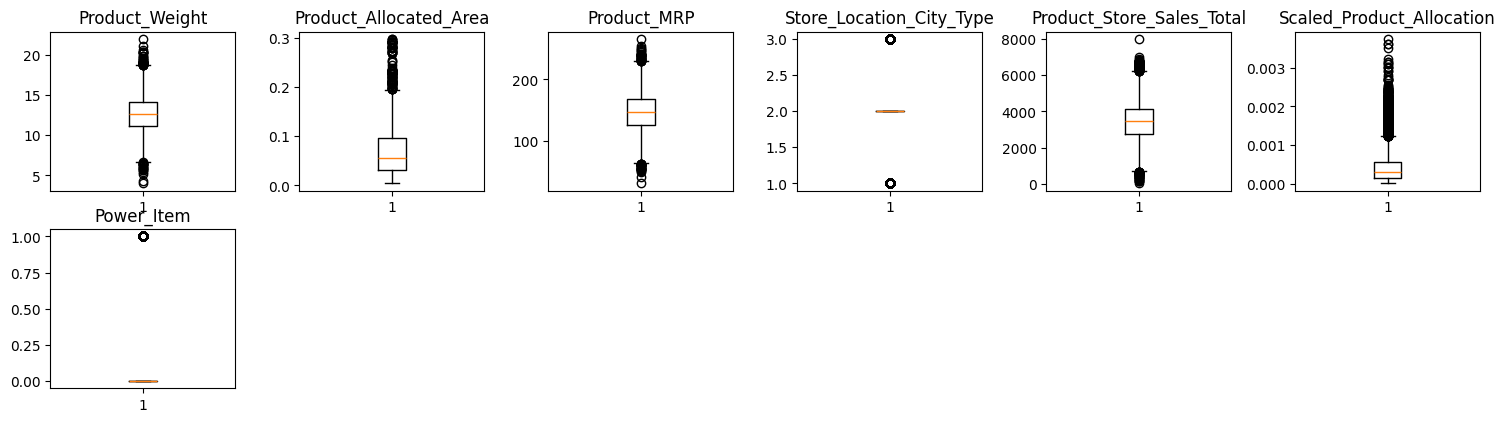

In [95]:
# Checking for outliers using boxplots
num_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_columns.remove('Store_Establishment_Year')

plt.figure(figsize=(15, 12))

for i, column in enumerate(num_columns):
    plt.subplot(6, 6, i + 1)
    plt.boxplot(data[column], whis=1.5)
    plt.tight_layout()
    plt.title(column)

plt.show()

* Though we have multiple outliers in all of our numeric variables, this looks pretty realistic for a retail environment where prices, product sizes, and allocation area can vary drastically.
* However, since we identified only a single product in the dataset that had a Product_MRP that was higher than Product_Store_Sales_Total, we're going to remove that single outlier.

In [96]:
# Removing our one outlier from the dataset where Product_MRP > Product_Store_Sales_Total
data = data[data['Product_MRP'] < data['Product_Store_Sales_Total']]
data.shape

(8762, 14)

### Dropping Redundant Variables

* We have some redundant variables in our dataset. Specifically, Store_Id, Store_Establishment_Year, and Store_Type are all unique to each store. We're going to drop all of them other than Store_Id.
* We'll also need to drop Product_Id since it is unique to each product.

In [97]:
# Dropping Store_Establishment_Year and Store_Type from the dataset
data.drop(['Store_Establishment_Year', 'Store_Type'], axis=1, inplace=True)

In [98]:
# Dropping Product_Id
data.drop('Product_Id', axis=1, inplace=True)

In [99]:
# Checking our work and taking another look at the head
data.head()

Product_Weight Product_Sugar_Content  Product_Allocated_Area  \
0           12.66             Low Sugar                   0.027   
1           16.54             Low Sugar                   0.144   
2           14.28               Regular                   0.031   
3           12.10             Low Sugar                   0.112   
4            9.57              No Sugar                   0.010   

     Product_Type  Product_MRP Store_Id Store_Size  Store_Location_City_Type  \
0  Mid Performing       117.08   OUT004     Medium                         2   
1  Mid Performing       171.43   OUT003     Medium                         1   
2  Mid Performing       162.08   OUT001       High                         2   
3  Mid Performing       186.31   OUT001       High                         2   
4  Mid Performing       123.67   OUT002      Small                         3   

   Product_Store_Sales_Total  Scaled_Product_Allocation  Power_Item  
0                    2842.40                   0.000084           0  
1                    4830.02                   0.001555           0  
2                    4130.16                   0.000284           0  
3                    4132.18                   0.001027           0  
4                    2279.36                   0.000128           0

### Splitting the Dataset

* We're going to do three tests based on the uncertainty in the noise attributed to Product_Allocated_Area:
1. We're going to test the model with Product_Allocated_Area as part of the data
2. We're going to test the model with Scaled_Product_Allocation as part of the data
3. We're going to drop both, Product_Allocated_Area and Scaled_Product_Allocation

In [100]:
# Separating our features and our target variable into X and y respectively
X_experiment1 = data.drop(['Product_Store_Sales_Total', 'Scaled_Product_Allocation'], axis=1)
X_experiment2 = data.drop(['Product_Store_Sales_Total', 'Product_Allocated_Area'], axis=1)
X_experiment3 = data.drop(['Product_Store_Sales_Total', 'Scaled_Product_Allocation', 'Product_Allocated_Area'], axis=1)
y = data['Product_Store_Sales_Total']

In [101]:
# Splitting the dataset into train and test and 80/20 ratio
X_exp1_train, X_exp1_test, y_train, y_test = train_test_split(X_experiment1, y, test_size=0.2, random_state=42, shuffle=True)
X_exp2_train, X_exp2_test, y_train, y_test = train_test_split(X_experiment2, y, test_size=0.2, random_state=42, shuffle=True)
X_exp3_train, X_exp3_test, y_train, y_test = train_test_split(X_experiment3, y, test_size=0.2, random_state=42, shuffle=True)

In [102]:
# Checking the shapes of our training and test sets
X_exp1_train.shape, X_exp1_test.shape, X_exp2_train.shape, X_exp2_test.shape, X_exp3_train.shape, X_exp3_test.shape

((7009, 9), (1753, 9), (7009, 9), (1753, 9), (7009, 8), (1753, 8))

In [103]:
X_exp1_train.head()

Product_Weight Product_Sugar_Content  Product_Allocated_Area  \
4151           15.17               Regular                   0.092   
5869           12.92             Low Sugar                   0.052   
100            12.26             Low Sugar                   0.140   
3410           10.28             Low Sugar                   0.143   
1790           16.38             Low Sugar                   0.082   

         Product_Type  Product_MRP Store_Id Store_Size  \
4151   Mid Performing       182.35   OUT001       High   
5869   Mid Performing       129.27   OUT004     Medium   
100   High Performing       138.27   OUT004     Medium   
3410   Mid Performing       147.44   OUT004     Medium   
1790   Mid Performing       205.16   OUT003     Medium   

      Store_Location_City_Type  Power_Item  
4151                         2           0  
5869                         2           0  
100                          2           0  
3410                         2           0  
1790                         1           0

In [104]:
X_exp2_train.head()

Product_Weight Product_Sugar_Content     Product_Type  Product_MRP  \
4151           15.17               Regular   Mid Performing       182.35   
5869           12.92             Low Sugar   Mid Performing       129.27   
100            12.26             Low Sugar  High Performing       138.27   
3410           10.28             Low Sugar   Mid Performing       147.44   
1790           16.38             Low Sugar   Mid Performing       205.16   

     Store_Id Store_Size  Store_Location_City_Type  Scaled_Product_Allocation  \
4151   OUT001       High                         2                   0.000844   
5869   OUT004     Medium                         2                   0.000161   
100    OUT004     Medium                         2                   0.000433   
3410   OUT004     Medium                         2                   0.000443   
1790   OUT003     Medium                         1                   0.000886   

      Power_Item  
4151           0  
5869           0  
100            0  
3410           0  
1790           0

In [105]:
X_exp3_train.head()

Product_Weight Product_Sugar_Content     Product_Type  Product_MRP  \
4151           15.17               Regular   Mid Performing       182.35   
5869           12.92             Low Sugar   Mid Performing       129.27   
100            12.26             Low Sugar  High Performing       138.27   
3410           10.28             Low Sugar   Mid Performing       147.44   
1790           16.38             Low Sugar   Mid Performing       205.16   

     Store_Id Store_Size  Store_Location_City_Type  Power_Item  
4151   OUT001       High                         2           0  
5869   OUT004     Medium                         2           0  
100    OUT004     Medium                         2           0  
3410   OUT004     Medium                         2           0  
1790   OUT003     Medium                         1           0

### Data Pre-Processing and Pipeline

* Since our numerical features are going to change with each training and test set, we'll have to define our numeric feature values just before beginning the model pipeline.

# **Model Building**

## Define functions for Model Evaluation

* We're going to build, tune, and test 2 models on the data and observe their performance.
* Since this dataset is full of outliers and noise, we're going with Random Forest for our baseline model and XGBoost as what we hope to be our primary model.
* We will use R-square as our evaluation metric to tell us how much of the sales variation can be explained and as a good overall estimation of model fit.
* We'll hyperparameter tune using GridSearchCV and use r_2 score to optimize the model.

In [106]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mean_absolute_percentage_error(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

The ML models to be built can be any two out of the following:
1. Decision Tree
2. Bagging
3. Random Forest
4. AdaBoost
5. Gradient Boosting
6. XGBoost

### Random Forest

In [107]:
# Defining our categorical features to a list
cat_features = data.select_dtypes(include=('object', 'category')).columns.tolist()
print(cat_features)
# Defining our numerical features to a list
num_features = X_exp1_train.select_dtypes(include=('int64', 'float64')).columns.tolist()
print(num_features)

['Product_Sugar_Content', 'Product_Type', 'Store_Id', 'Store_Size']
['Product_Weight', 'Product_Allocated_Area', 'Product_MRP', 'Store_Location_City_Type', 'Power_Item']


In [108]:
# Create a preprocessing pipeline for the features

preprocessor = make_column_transformer(
    (Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore'))]), cat_features), ('passthrough', num_features)
)

In [109]:
# Initiating an instance of Random Forest model
rf_model = RandomForestRegressor(random_state=42)
# Preprocessing the data for the model
rf_model = make_pipeline(preprocessor, rf_model)
# Fitting the data to the model and training
rf_model.fit(X_exp1_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Product_Type', 'Store_Id',
                                                   'Store_Size']),
                                                 ('passthrough', 'passthrough',
                                                  ['Product_Weight',
                                                   'Product_Allocated_Area',
                                                   'Product_MRP',
                                                   'Store_Location_City_Type',
                                                   'Power_Item'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [110]:
# Checking the model performance on the training set
rf_model_train_perf = model_performance_regression(rf_model, X_exp1_train, y_train)
rf_model_train_perf

RMSE        MAE  R-squared  Adj. R-squared      MAPE
0  82.54304  29.806618   0.993985        0.993977  0.011465

In [111]:
# Checking the model performance on the test set
rf_model_test_perf = model_performance_regression(rf_model, X_exp1_test, y_test)
rf_model_test_perf

RMSE        MAE  R-squared  Adj. R-squared      MAPE
0  222.261299  79.049819   0.956607        0.956383  0.032223

* WOW! Very nice starting point!
* Our RF model explains about 95.6% of the variance in the data, and it is only off by ~3% on predictions and an average of ~79 sales units per product with Product_Allocated_Area included in the dataset.

In [112]:
# Defining our categorical features to a list
cat_features = data.select_dtypes(include=('object', 'category')).columns.tolist()
print(cat_features)
# Defining our numerical features to a list
num_features = X_exp2_train.select_dtypes(include=('int64', 'float64')).columns.tolist()
print(num_features)

['Product_Sugar_Content', 'Product_Type', 'Store_Id', 'Store_Size']
['Product_Weight', 'Product_MRP', 'Store_Location_City_Type', 'Scaled_Product_Allocation', 'Power_Item']


In [113]:
# Create a preprocessing pipeline for the features

preprocessor = make_column_transformer(
    (Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore'))]), cat_features), ('passthrough', num_features)
)

In [114]:
# Initiating an instance of Random Forest model
rf_model2 = RandomForestRegressor(random_state=42)
# Preprocessing the data for the model
rf_model2 = make_pipeline(preprocessor, rf_model2)
# Fitting the data to the model and training
rf_model2.fit(X_exp2_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Product_Type', 'Store_Id',
                                                   'Store_Size']),
                                                 ('passthrough', 'passthrough',
                                                  ['Product_Weight',
                                                   'Product_MRP',
                                                   'Store_Location_City_Type',
                                                   'Scaled_Product_Allocation',
                                                   'Power_Item'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [115]:
# Checking the model performance on the training set
rf_model2_train_perf = model_performance_regression(rf_model2, X_exp2_train, y_train)
rf_model2_train_perf

RMSE        MAE  R-squared  Adj. R-squared      MAPE
0  82.549778  29.790899   0.993984        0.993976  0.011462

In [116]:
# Checking the model performance on the test set
rf_model2_test_perf = model_performance_regression(rf_model2, X_exp2_test, y_test)
rf_model2_test_perf

RMSE        MAE  R-squared  Adj. R-squared      MAPE
0  222.194862  78.998337   0.956633        0.956409  0.032368

* By removing Product_Allocated_Area and replacing it with the Scaled_Product_Allocation variable, we were able to get just a tiny bit over improvement in the model.
* R-squared improved by ~0.0003%, MAE improved by about an average of 0.05 units per product.

In [117]:
# Defining our categorical features to a list
cat_features = data.select_dtypes(include=('object', 'category')).columns.tolist()
print(cat_features)
# Defining our numerical features to a list
num_features = X_exp3_train.select_dtypes(include=('int64', 'float64')).columns.tolist()
print(num_features)

['Product_Sugar_Content', 'Product_Type', 'Store_Id', 'Store_Size']
['Product_Weight', 'Product_MRP', 'Store_Location_City_Type', 'Power_Item']


In [118]:
# Create a preprocessing pipeline for the features

preprocessor = make_column_transformer(
    (Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore'))]), cat_features), ('passthrough', num_features)
)

In [119]:
# Initiating an instance of Random Forest model
rf_model3 = RandomForestRegressor(random_state=42)
# Preprocessing the data for the model
rf_model3 = make_pipeline(preprocessor, rf_model3)
# Fitting the data to the model and training
rf_model3.fit(X_exp3_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Product_Type', 'Store_Id',
                                                   'Store_Size']),
                                                 ('passthrough', 'passthrough',
                                                  ['Product_Weight',
                                                   'Product_MRP',
                                                   'Store_Location_City_Type',
                                                   'Power_Item'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [120]:
# Checking the model performance on the training set
rf_model3_train_perf = model_performance_regression(rf_model3, X_exp3_train, y_train)
rf_model3_train_perf

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  82.627885  29.25561   0.993972        0.993966  0.011361

In [121]:
# Checking the model performance on the test set
rf_model3_test_perf = model_performance_regression(rf_model3, X_exp3_test, y_test)
rf_model3_test_perf

RMSE        MAE  R-squared  Adj. R-squared      MAPE
0  224.792626  78.979781   0.955613         0.95541  0.032318

In [122]:
# Creating a dataframe to compare all of the test metrics of all 3 of our RF models
rf_performance_df = pd.concat([rf_model_test_perf, rf_model2_test_perf, rf_model3_test_perf], ignore_index=True)
rf_performance_df.index = ['Product_Allocated_Area', 'Scaled_Product_Allocation', 'No Allocation']
print("Random Forest Test Performance Comparison")
rf_performance_df

Random Forest Test Performance Comparison


RMSE        MAE  R-squared  Adj. R-squared  \
Product_Allocated_Area     222.261299  79.049819   0.956607        0.956383   
Scaled_Product_Allocation  222.194862  78.998337   0.956633        0.956409   
No Allocation              224.792626  78.979781   0.955613        0.955410   

                               MAPE  
Product_Allocated_Area     0.032223  
Scaled_Product_Allocation  0.032368  
No Allocation              0.032318

* Removing both variables, Product_Allocation_Area and Scaled_Product_Allocation actually hurt our performance with RF.
* But in the name of science, and since we've already done the work, let's continue testing with all three sets.

### XGBoost

In [123]:
# Defining our categorical features to a list
cat_features = data.select_dtypes(include=('object', 'category')).columns.tolist()
print(cat_features)
# Defining our numerical features to a list
num_features = X_exp1_train.select_dtypes(include=('int64', 'float64')).columns.tolist()
print(num_features)

['Product_Sugar_Content', 'Product_Type', 'Store_Id', 'Store_Size']
['Product_Weight', 'Product_Allocated_Area', 'Product_MRP', 'Store_Location_City_Type', 'Power_Item']


In [124]:
# Create a preprocessing pipeline for the features

preprocessor = make_column_transformer(
    (Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore'))]), cat_features), ('passthrough', num_features)
)

In [125]:
# Initiating and instance of XGBoost model
xgb_model = XGBRegressor(random_state=42)
# Preprocessing the data for the model
xgb_model = make_pipeline(preprocessor, xgb_model)
# Fitting the data to the model and training
xgb_model.fit(X_exp1_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Product_Type', 'Store_Id',
                                                   'Store_Size']),
                                                 ('passthrough', 'passthrough',
                                                  ['Product_Weight',
                                                   'Product_Allocated_Area',
                                                   'Product_MRP',
                                                   'Store_Location_City_Type',
                                                   'Power_Item'])])),
                ('x...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [126]:
# Checking the model performance on the training set
xgb_model_train_perf = model_performance_regression(xgb_model, X_exp1_train, y_train)
xgb_model_train_perf

RMSE        MAE  R-squared  Adj. R-squared      MAPE
0  93.91576  45.372834   0.992213        0.992203  0.016514

In [127]:
# Checking the model performance on the test set
xgb_model_test_perf = model_performance_regression(xgb_model, X_exp1_test, y_test)
xgb_model_test_perf

RMSE        MAE  R-squared  Adj. R-squared      MAPE
0  233.557048  97.712543   0.952085        0.951837  0.039378

* With Product_Allocated_Area included, our XGB model is explaining about 95% of the variance, off by about 3% and an average of ~97 sales units per product.

In [128]:
# Defining our categorical features to a list
cat_features = data.select_dtypes(include=('object', 'category')).columns.tolist()
print(cat_features)
# Defining our numerical features to a list
num_features = X_exp2_train.select_dtypes(include=('int64', 'float64')).columns.tolist()
print(num_features)

['Product_Sugar_Content', 'Product_Type', 'Store_Id', 'Store_Size']
['Product_Weight', 'Product_MRP', 'Store_Location_City_Type', 'Scaled_Product_Allocation', 'Power_Item']


In [129]:
# Create a preprocessing pipeline for the features

preprocessor = make_column_transformer(
    (Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore'))]), cat_features), ('passthrough', num_features)
)

In [130]:
# Initiating and instance of XGBoost model
xgb_model2 = XGBRegressor(random_state=42)
# Preprocessing the data for the model
xgb_model2 = make_pipeline(preprocessor, xgb_model2)
# Fitting the data to the model and training
xgb_model2.fit(X_exp2_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Product_Type', 'Store_Id',
                                                   'Store_Size']),
                                                 ('passthrough', 'passthrough',
                                                  ['Product_Weight',
                                                   'Product_MRP',
                                                   'Store_Location_City_Type',
                                                   'Scaled_Product_Allocation',
                                                   'Power_Item'])])),...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [131]:
# Checking the model performance on the training set
xgb_model2_train_perf = model_performance_regression(xgb_model2, X_exp2_train, y_train)
xgb_model2_train_perf

RMSE        MAE  R-squared  Adj. R-squared      MAPE
0  96.243396  46.466926   0.991822        0.991812  0.016348

In [132]:
# Checking the model performance on the test set
xgb_model2_test_perf = model_performance_regression(xgb_model2, X_exp2_test, y_test)
xgb_model2_test_perf

RMSE         MAE  R-squared  Adj. R-squared      MAPE
0  233.615045  100.485151   0.952061        0.951813  0.039596

* It seems including Space_Allocation_Area instead of Product_Allocated_Area has hurt our XGB model's performance by the slimmest of margins - exactly opposite of RF.

In [133]:
# Defining our categorical features to a list
cat_features = data.select_dtypes(include=('object', 'category')).columns.tolist()
print(cat_features)
# Defining our numerical features to a list
num_features = X_exp3_train.select_dtypes(include=('int64', 'float64')).columns.tolist()
print(num_features)

['Product_Sugar_Content', 'Product_Type', 'Store_Id', 'Store_Size']
['Product_Weight', 'Product_MRP', 'Store_Location_City_Type', 'Power_Item']


In [134]:
# Create a preprocessing pipeline for the features

preprocessor = make_column_transformer(
    (Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore'))]), cat_features), ('passthrough', num_features)
)

In [135]:
# Initiating and instance of XGBoost model
xgb_model3 = XGBRegressor(random_state=42)
# Preprocessing the data for the model
xgb_model3 = make_pipeline(preprocessor, xgb_model3)
# Fitting the data to the model and training
xgb_model3.fit(X_exp3_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Product_Type', 'Store_Id',
                                                   'Store_Size']),
                                                 ('passthrough', 'passthrough',
                                                  ['Product_Weight',
                                                   'Product_MRP',
                                                   'Store_Location_City_Type',
                                                   'Power_Item'])])),
                ('xgbregressor',
                 XGBRegressor...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [136]:
# Checking the model performance on the training set
xgb_model3_train_perf = model_performance_regression(xgb_model3, X_exp3_train, y_train)
xgb_model3_train_perf

RMSE        MAE  R-squared  Adj. R-squared      MAPE
0  103.077296  46.913027    0.99062        0.990609  0.017452

In [137]:
# Checking the model performance on the test set
xgb_model3_test_perf = model_performance_regression(xgb_model3, X_exp3_test, y_test)
xgb_model3_test_perf

RMSE        MAE  R-squared  Adj. R-squared     MAPE
0  232.995221  94.052051   0.952315        0.952096  0.03815

In [138]:
# Creating a dataframe of all of the metrics of all of our XGB models for comparison
xgb_performance_df = pd.concat([xgb_model_test_perf, xgb_model2_test_perf, xgb_model3_test_perf], ignore_index=True)
xgb_performance_df.index = ['Product_Allocated_Area', 'Scaled_Product_Allocation', 'No Allocation']
print("XGBoost Test Performance Comparison")
xgb_performance_df

XGBoost Test Performance Comparison


RMSE         MAE  R-squared  Adj. R-squared  \
Product_Allocated_Area     233.557048   97.712543   0.952085        0.951837   
Scaled_Product_Allocation  233.615045  100.485151   0.952061        0.951813   
No Allocation              232.995221   94.052051   0.952315        0.952096   

                               MAPE  
Product_Allocated_Area     0.039378  
Scaled_Product_Allocation  0.039596  
No Allocation              0.038150

* How surprising! Training our RF model without either product allocated space variable produced the lowest performance, but produced the highest performance with our XGB model.

# **Model Performance Improvement - Hyperparameter Tuning**

* Going forward, we'll use the Scaled_Product_Allocation dataset (X_exp2) for Random Forest tuning, and we'll use the 'No Allocation' dataset (X_exp3) for XG Boost tuning.

### Random Forest Tuned

In [139]:
# Defining our categorical features to a list
cat_features = data.select_dtypes(include=('object', 'category')).columns.tolist()
print(cat_features)
# Defining our numerical features to a list
num_features = X_exp2_train.select_dtypes(include=('int64', 'float64')).columns.tolist()
print(num_features)

# Create a preprocessing pipeline for the features
preprocessor = make_column_transformer(
    (Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore'))]), cat_features), ('passthrough', num_features)
)

['Product_Sugar_Content', 'Product_Type', 'Store_Id', 'Store_Size']
['Product_Weight', 'Product_MRP', 'Store_Location_City_Type', 'Scaled_Product_Allocation', 'Power_Item']


In [140]:
# Initiating another instance of Random Forest to tune
rf_tuned2 = RandomForestRegressor(random_state=42)
# Preprocessing the data for the model
rf_tuned2 = make_pipeline(preprocessor, rf_tuned2)

#Defining my cross-validation strategy
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

# Setting up the parameter grid
parameters = {
    'randomforestregressor__n_estimators': [5, 10, 20, 30],
    'randomforestregressor__max_features': [2, 3, 5, 7],
    'randomforestregressor__max_depth' : [2, 3, 4, 5],
}

# Running the GridSearchCV
grid_obj = GridSearchCV(rf_tuned2, parameters, cv=cv_strategy, scoring='r2', n_jobs=-1)
grid_obj.fit(X_exp2_train, y_train)

# Setting the best parameters on our tuned model
rf_tuned2 = grid_obj.best_estimator_

# Fitting the data to the model
rf_tuned2.fit(X_exp2_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Product_Type', 'Store_Id',
                                                   'Store_Size']),
                                                 ('passthrough', 'passthrough',
                                                  ['Product_Weight',
                                                   'Product_MRP',
                                                   'Store_Location_City_Type',
                                                   'Scaled_Product_Allocation',
                                                   'Power_Item'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=5, max_features=7,
                                       n_estimators=30, random_state=42))])

In [141]:
grid_obj.best_params_

{'randomforestregressor__max_depth': 5,
 'randomforestregressor__max_features': 7,
 'randomforestregressor__n_estimators': 30}

In [142]:
# Checking the performance of rf_tuned2 on the training set
rf_tuned2_train_perf = model_performance_regression(rf_tuned2, X_exp2_train, y_train)
rf_tuned2_train_perf

RMSE         MAE  R-squared  Adj. R-squared      MAPE
0  322.345145  239.785823   0.908265        0.908147  0.084895

In [143]:
# Checking the peformance of rf_tuned2 on the test set
rf_tuned2_test_perf = model_performance_regression(rf_tuned2, X_exp2_test, y_test)
rf_tuned2_test_perf

RMSE         MAE  R-squared  Adj. R-squared      MAPE
0  329.725965  245.720064   0.904502        0.904009  0.091551

* With Scaled_Product_Allocation, overfitting has been nearly eliminated but at the cost of performance as our tuned RF is down ~5% on R-squared score compared to the base model.

### XGBoost Tuned

In [144]:
# Defining our categorical features to a list
cat_features = data.select_dtypes(include=('object', 'category')).columns.tolist()
print(cat_features)
# Defining our numerical features to a list
num_features = X_exp3_train.select_dtypes(include=('int64', 'float64')).columns.tolist()
print(num_features)

# Create a preprocessing pipeline for the features
preprocessor = make_column_transformer(
    (Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore'))]), cat_features), ('passthrough', num_features)
)

['Product_Sugar_Content', 'Product_Type', 'Store_Id', 'Store_Size']
['Product_Weight', 'Product_MRP', 'Store_Location_City_Type', 'Power_Item']


In [145]:
# Initiating another instance of XGBoost
xgb_tuned = XGBRegressor(random_state=42)
# Preprocessing the data for the model
xgb_tuned = make_pipeline(preprocessor, xgb_tuned)

# Defining our cross-validation strategy
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

# Setting the parameter grid
parameters = {
    'xgbregressor__n_estimators': [10, 20, 30, 40, 50],
    'xgbregressor__subsample': [0.6, 0.7, 0.8],
    'xgbregressor__gamma': [0, 0.3, 0.5, 1, 3],
    'xgbregressor__colsample_bytree': [0.6, 0.7, 0.8],
    'xgbregressor__max_depth': [2, 3, 4, 5, 6],
    'xgbregressor__colsample_bylevel': [0.6, 0.7, 0.8]
}

# Running the GridSearchCV
grid_obj = GridSearchCV(xgb_tuned, parameters, cv=cv_strategy, scoring='r2', n_jobs=-1)
grid_obj.fit(X_exp3_train, y_train)

# Setting the best parameters on our tuned model
xgb_tuned = grid_obj.best_estimator_

# Fitting the data to the model
xgb_tuned.fit(X_exp3_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Product_Type', 'Store_Id',
                                                   'Store_Size']),
                                                 ('passthrough', 'passthrough',
                                                  ['Product_Weight',
                                                   'Product_MRP',
                                                   'Store_Location_City_Type',
                                                   'Power_Item'])])),
                ('xgbregressor',
                 XGBRegressor...
                              feature_types=None, gamma=0, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=30, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [146]:
# Listing the best parameters our xgb_tuned model found
grid_obj.best_params_

{'xgbregressor__colsample_bylevel': 0.8,
 'xgbregressor__colsample_bytree': 0.8,
 'xgbregressor__gamma': 0,
 'xgbregressor__max_depth': 6,
 'xgbregressor__n_estimators': 30,
 'xgbregressor__subsample': 0.7}

In [147]:
# Checking the model's performance on the training set
xgb_tuned_train_perf = model_performance_regression(xgb_tuned, X_exp3_train, y_train)
xgb_tuned_train_perf

RMSE        MAE  R-squared  Adj. R-squared      MAPE
0  171.102881  76.520863   0.974153        0.974124  0.029741

In [148]:
# Checking the model's performance on the test set
xgb_tuned_test_perf = model_performance_regression(xgb_tuned, X_exp3_test, y_test)
xgb_tuned_test_perf

RMSE        MAE  R-squared  Adj. R-squared      MAPE
0  226.820086  97.687981   0.954809        0.954602  0.039332

* Without either Product_Allocated_Area or Scaled_Product_Allocation, our XGB tuned model explained about 95.4% of the variance, and was off by ~4% on predictions by an average of ~97.6 sales units per product.

In [149]:
# Creating a dataframe to compare all of the test metrics of all 4 our best models so far
model_performance_matrix_df = pd.concat([rf_model2_test_perf, rf_tuned2_test_perf, xgb_model3_test_perf, xgb_tuned_test_perf], ignore_index=True)
model_performance_matrix_df.index = ['RF Scaled', 'RF Tuned Scaled', 'XGB No Allocation', 'XGB Tuned No Allocation']
print("Model Performance Comparison")
model_performance_matrix_df

Model Performance Comparison


RMSE         MAE  R-squared  Adj. R-squared  \
RF Scaled                222.194862   78.998337   0.956633        0.956409   
RF Tuned Scaled          329.725965  245.720064   0.904502        0.904009   
XGB No Allocation        232.995221   94.052051   0.952315        0.952096   
XGB Tuned No Allocation  226.820086   97.687981   0.954809        0.954602   

                             MAPE  
RF Scaled                0.032368  
RF Tuned Scaled          0.091551  
XGB No Allocation        0.038150  
XGB Tuned No Allocation  0.039332

* Our Random Forest Tuned model with the scaled product allocation performed best. Let's take a look at the feature importances and see where we may be able to further refine it.

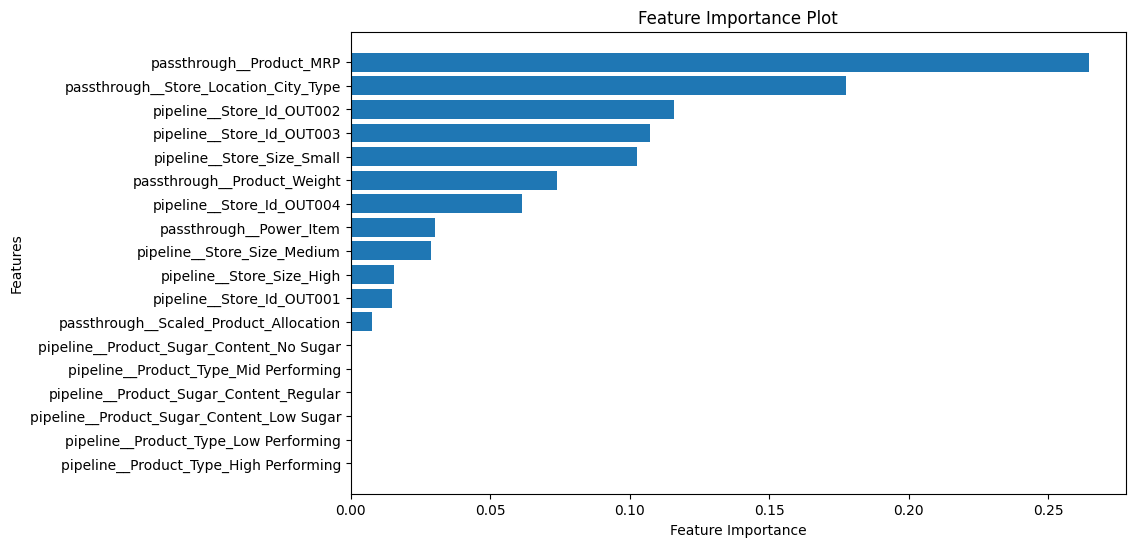

In [150]:
# Plotting the feature importances from our Random Forest model trained on Scaled_Product_Allocation
plt.figure(figsize=(10, 6))

# Get feature names and importances
feature_names = rf_tuned2.named_steps['columntransformer'].get_feature_names_out()
importances = rf_tuned2.named_steps['randomforestregressor'].feature_importances_

# Create a pandas Series for easier sorting
feature_importances = pd.Series(importances, index=feature_names)

# Sort the features by importance in descending order
sorted_feature_importances = feature_importances.sort_values(ascending=True)

# Plot the sorted feature importances
plt.barh(sorted_feature_importances.index, sorted_feature_importances.values)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

* It seems the Sugar Content and the Feature Engineering we performed on the product categories may be taking away from the model's performance. Let's remove our feature engineering and the Sugar Content variable and run it back through the model.

In [151]:
# Reloading the data and making the necessary transformations
data = df.copy()
# Creating a new variable - "Scaled_Product_Allocation" that divides the current "Product_Allocated_Area" by the sums
data['Scaled_Product_Allocation'] = data['Product_Allocated_Area'] / data.groupby('Store_Id')['Product_Allocated_Area'].transform('sum')
# Mapping the Store_Location_City_Type to ordinal values
city_type_map = {'Tier 1':1, 'Tier 2': 2, 'Tier 3': 3}
data['Store_Location_City_Type'] = data['Store_Location_City_Type'].map(city_type_map)
# Adding a column to our dataframe that identifies the power items from our power_item_df
data['Power_Item'] = data['Product_Id'].isin(power_item_df['Product_Id']).astype(int)
# Removing our one outlier from the dataset where Product_MRP > Product_Store_Sales_Total
data = data[data['Product_MRP'] < data['Product_Store_Sales_Total']]
# Dropping non-essential variables
data.drop(['Store_Establishment_Year', 'Store_Type', 'Product_Id', 'Product_Allocated_Area', 'Product_Sugar_Content'], axis=1, inplace=True)
# Reviewing our changes
data.head()


Product_Weight        Product_Type  Product_MRP Store_Id Store_Size  \
0           12.66        Frozen Foods       117.08   OUT004     Medium   
1           16.54               Dairy       171.43   OUT003     Medium   
2           14.28              Canned       162.08   OUT001       High   
3           12.10        Baking Goods       186.31   OUT001       High   
4            9.57  Health and Hygiene       123.67   OUT002      Small   

   Store_Location_City_Type  Product_Store_Sales_Total  \
0                         2                    2842.40   
1                         1                    4830.02   
2                         2                    4130.16   
3                         2                    4132.18   
4                         3                    2279.36   

   Scaled_Product_Allocation  Power_Item  
0                   0.000084           0  
1                   0.001555           0  
2                   0.000284           0  
3                   0.001027           0  
4                   0.000128           0

In [152]:
# Splitting the new dataset into train and test
X = data.drop('Product_Store_Sales_Total', axis=1)
y = data['Product_Store_Sales_Total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [153]:
# Defining our categorical features to a list
cat_features = X_train.select_dtypes(include=('object', 'category')).columns.tolist()
print(cat_features)
# Defining our numerical features to a list
num_features = X_train.select_dtypes(include=('int64', 'float64')).columns.tolist()
print(num_features)

# Create a preprocessing pipeline for the features
preprocessor = make_column_transformer(
    (Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore'))]), cat_features), ('passthrough', num_features)
)

['Product_Type', 'Store_Id', 'Store_Size']
['Product_Weight', 'Product_MRP', 'Store_Location_City_Type', 'Scaled_Product_Allocation', 'Power_Item']


In [154]:
# Initiating a new instance of Random Forest
rf_final = RandomForestRegressor(random_state=42)
# Preprocessing the data for the model
rf_final = make_pipeline(preprocessor, rf_final)
# Fitting rf_final to the dataset
rf_final.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Type', 'Store_Id',
                                                   'Store_Size']),
                                                 ('passthrough', 'passthrough',
                                                  ['Product_Weight',
                                                   'Product_MRP',
                                                   'Store_Location_City_Type',
                                                   'Scaled_Product_Allocation',
                                                   'Power_Item'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [155]:
# Getting the training performance for rf_final
rf_final_train_perf = model_performance_regression(rf_final, X_train, y_train)
rf_final_train_perf

RMSE        MAE  R-squared  Adj. R-squared      MAPE
0  81.819401  29.464696    0.99409        0.994083  0.011343

In [156]:
# Getting the test performance for rf_final
rf_final_test_perf = model_performance_regression(rf_final, X_test, y_test)
rf_final_test_perf

RMSE        MAE  R-squared  Adj. R-squared      MAPE
0  221.173438  78.494145   0.957031        0.956834  0.032428

* This is promising. Let's drop the Scaled_Product_Allocation and run it through XG Boost again.

In [157]:
# Dropping 'Scaled_Product_Allocation' X_train and X_test
X_train.drop('Scaled_Product_Allocation', axis=1, inplace=True)
X_test.drop('Scaled_Product_Allocation', axis=1, inplace=True)

In [158]:
# Defining our categorical features to a list
cat_features = X_train.select_dtypes(include=('object', 'category')).columns.tolist()
print(cat_features)
# Defining our numerical features to a list
num_features = X_train.select_dtypes(include=('int64', 'float64')).columns.tolist()
print(num_features)

# Create a preprocessing pipeline for the features
preprocessor = make_column_transformer(
    (Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore'))]), cat_features), ('passthrough', num_features)
)

['Product_Type', 'Store_Id', 'Store_Size']
['Product_Weight', 'Product_MRP', 'Store_Location_City_Type', 'Power_Item']


In [159]:
# Initializing a new instance of XG Boost with the latest dataset
xgb_final = XGBRegressor(random_state=42)
# Preprocessing the data for the model
xgb_final = make_pipeline(preprocessor, xgb_final)
# Fitting xgb_final to the dataset
xgb_final.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Type', 'Store_Id',
                                                   'Store_Size']),
                                                 ('passthrough', 'passthrough',
                                                  ['Product_Weight',
                                                   'Product_MRP',
                                                   'Store_Location_City_Type',
                                                   'Power_Item'])])),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [160]:
# Getting the training performance for xgb_final
xgb_final_train_perf = model_performance_regression(xgb_final, X_train, y_train)
xgb_final_train_perf

RMSE        MAE  R-squared  Adj. R-squared      MAPE
0  101.938707  47.963409   0.990826        0.990817  0.017759

In [161]:
# Getting the test peformance for xgb_final
xgb_final_test_perf = model_performance_regression(xgb_final, X_test, y_test)
xgb_final_test_perf

RMSE        MAE  R-squared  Adj. R-squared      MAPE
0  237.961544  97.803115    0.95026        0.950061  0.038041

* Not the performance I had hoped for.
* Let's take one last look at our best models and choose the winner.

# **Model Performance Comparison, Final Model Selection, and Serialization**

### Model Comparison and Final Model Selection

In [162]:
# Creating a dataframe to compare all of the test metrics of all 6 of our last models
final_model_performance_matrix_df = pd.concat([rf_tuned2_test_perf, xgb_final_test_perf, xgb_model3_test_perf, xgb_tuned_test_perf, rf_model2_test_perf, rf_final_test_perf], ignore_index=True)
final_model_performance_matrix_df.index = ['RF Tuned Scaled', 'XGB Final w/ Product_Type', 'XGB No Allocation', 'XGB Tuned No Allocation', 'RF Scaled ', 'RF Final w/ Product_Type']
print("Model Performance Comparison")
final_model_performance_matrix_df

Model Performance Comparison


RMSE         MAE  R-squared  Adj. R-squared  \
RF Tuned Scaled            329.725965  245.720064   0.904502        0.904009   
XGB Final w/ Product_Type  237.961544   97.803115   0.950260        0.950061   
XGB No Allocation          232.995221   94.052051   0.952315        0.952096   
XGB Tuned No Allocation    226.820086   97.687981   0.954809        0.954602   
RF Scaled                  222.194862   78.998337   0.956633        0.956409   
RF Final w/ Product_Type   221.173438   78.494145   0.957031        0.956834   

                               MAPE  
RF Tuned Scaled            0.091551  
XGB Final w/ Product_Type  0.038041  
XGB No Allocation          0.038150  
XGB Tuned No Allocation    0.039332  
RF Scaled                  0.032368  
RF Final w/ Product_Type   0.032428

* From looking at our Model Performance Comparison, I think we can safely eliminate all but RF Scaled and RF Final, but let's take one last look at how much they are overfit before deciding on a final winner.

In [163]:
# Creating a dataframe of training, test, and difference scores for rf_model2 and rf_final
training_scores = [rf_model2_train_perf['R-squared'][0], rf_final_train_perf['R-squared'][0]]
test_scores = [rf_model2_test_perf['R-squared'][0], rf_final_test_perf['R-squared'][0]]
difference_scores = [rf_model2_test_perf['R-squared'][0] - rf_model2_train_perf['R-squared'][0], rf_final_test_perf['R-squared'][0] - rf_final_train_perf['R-squared'][0]]
final_rf_perf_df = pd.DataFrame({'Training Score': training_scores, 'Test Score': test_scores, 'Difference': difference_scores}, index=['RF Scaled', 'RF Final'])
final_rf_perf_df

Training Score  Test Score  Difference
RF Scaled        0.993984    0.956633   -0.037351
RF Final         0.994090    0.957031   -0.037059

* Since RF Final is the least overfit of our best models, we'll move forward with RF Final as the winning model.

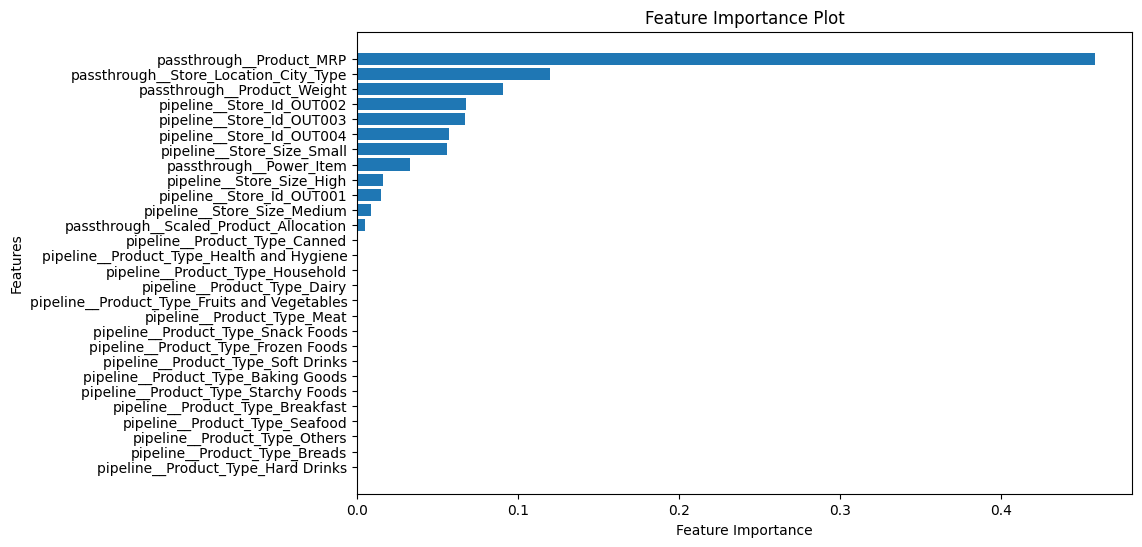

In [164]:
# Taking a peek at our Feature Importances of the final model
# Plotting the feature importances from our Random Forest model trained on Scaled_Product_Allocation
plt.figure(figsize=(10, 6))

# Get feature names and importances
feature_names = rf_final.named_steps['columntransformer'].get_feature_names_out()
importances = rf_final.named_steps['randomforestregressor'].feature_importances_

# Create a pandas Series for easier sorting
feature_importances = pd.Series(importances, index=feature_names)

# Sort the features by importance in descending order
sorted_feature_importances = feature_importances.sort_values(ascending=True)

# Plot the sorted feature importances
plt.barh(sorted_feature_importances.index, sorted_feature_importances.values)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

* In all honesty, it may not have been worth the extra effort, but in the retail world, every penny counts!

### Model Serialization

In [165]:
# Creating the backend file directory
os.makedirs('backend_files', exist_ok=True)

In [166]:
# Defining the file path to save the serialized model along with the preprocessing steps
saved_model_path = 'backend_files/sales_prediction_model_v1_0.joblib'

In [167]:
# Saving the best model pipeline using joblib
joblib.dump(rf_final, saved_model_path)

print(f"Model saved successfully at {saved_model_path}")

Model saved successfully at backend_files/sales_prediction_model_v1_0.joblib


In [168]:
# Loading the saved model pipeline from the file
saved_model = joblib.load(saved_model_path)

print("Model loaded successfully")

Model loaded successfully


In [169]:
saved_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Type', 'Store_Id',
                                                   'Store_Size']),
                                                 ('passthrough', 'passthrough',
                                                  ['Product_Weight',
                                                   'Product_MRP',
                                                   'Store_Location_City_Type',
                                                   'Scaled_Product_Allocation',
                                                   'Power_Item'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

### Making Predictions

We'll now make some predictions on the test set with our deserialized model.

* First we've got to reinstitute our dataset again

In [172]:
# Reloading the data and making the necessary transformations
data = df.copy()
# Creating a new variable - "Scaled_Product_Allocation" that divides the current "Product_Allocated_Area" by the sums
data['Scaled_Product_Allocation'] = data['Product_Allocated_Area'] / data.groupby('Store_Id')['Product_Allocated_Area'].transform('sum')
# Mapping the Store_Location_City_Type to ordinal values
city_type_map = {'Tier 1':1, 'Tier 2': 2, 'Tier 3': 3}
data['Store_Location_City_Type'] = data['Store_Location_City_Type'].map(city_type_map)
# Adding a column to our dataframe that identifies the power items from our power_item_df
data['Power_Item'] = data['Product_Id'].isin(power_item_df['Product_Id']).astype(int)
# Removing our one outlier from the dataset where Product_MRP > Product_Store_Sales_Total
data = data[data['Product_MRP'] < data['Product_Store_Sales_Total']]
# Dropping non-essential variables
data.drop(['Store_Establishment_Year', 'Store_Type', 'Product_Id', 'Product_Allocated_Area', 'Product_Sugar_Content'], axis=1, inplace=True)
# Splitting the new dataset into train and test
X = data.drop('Product_Store_Sales_Total', axis=1)
y = data['Product_Store_Sales_Total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [174]:
# Predicting with the deserialized model on our test set
saved_model.predict(X_test)

array([3272.2596, 3567.1756, 2396.9962, ..., 3551.6014, 2747.6673,
       4280.7674])

Fantastic! Our model can be used to make predictions on new data now without the need to be retrained.

# **Deployment - Backend**

## Flask Web Framework


In [175]:
%%writefile backend_files/app.py

# Importing the necesssary libraries
import numpy as np
import pandas as pd
import joblib
from flask import Flask, request, jsonify

# Initializing the Flask app
superkart_api = Flask("SuperKart Sales Predictor")

# Loading the trained model
model = joblib.load('sales_prediction_model_v1_0.joblib')

# Defining a route for the home page
@superkart_api.get('/')
def home():
    return "Welcome to SuperKart Sales Predictor"

# Defining and endpoint to predict on a single product
@superkart_api.post('/v1/predict')
def predict_sales():
  # Get JSON data from the request
  data = request.get_json()

  # Extract relevant product attributes from the input data.
  sample = {
      'Product_Weight': data['Product_Weight'],
      'Product_Type': data['Product_Type'],
      'Product_MRP': data['Product_MRP'],
      'Store_Id': data['Store_Id'],
      'Store_Size': data['Store_Size'],
      'Store_Location_City_Type': data['Store_Location_City_Type'],
      'Scaled_Product_Allocation': data['Scaled_Product_Allocation'],
      'Power_Item': data['Power_Item'],
  }

  # Convert the extracted data to a DataFrame
  input_data = pd.DataFrame([sample])

  # Make a sales prediction using the trained model
  prediction = model.predict(input_data).tolist()[0]

  # Return the prediction as a JSON response
  return jsonify({'Sales': prediction})

# Running the Flask app in debug mode
if __name__ == '__main__':
    superkart_api.run(debug=True)

Writing backend_files/app.py


## Dependencies File

In [176]:
%%writefile backend_files/requirements.txt
pandas==2.2.2
numpy==2.0.2
scikit-learn==1.6.1
seaborn==0.13.2
joblib==1.4.2
xgboost==2.1.4
joblib==1.4.2
Werkzeug==2.2.2
flask==2.2.2
gunicorn==20.1.0
requests==2.32.3
uvicorn[standard]
streamlit==1.43.2

Writing backend_files/requirements.txt


## Dockerfile

In [177]:
%%writefile backend_files/Dockerfile
# Use a minimal base image with Python 3.9 installed
FROM python:3.9-slim

# Set the working directory inside the container
WORKDIR /app

# Copy all files from the current directory to the container's working directory
COPY . .

# Install dependencies from the requirements file without using cache to reduce image size
RUN pip install --no-cache-dir --upgrade -r requirements.txt

# Define the command to start the application using Gunicorn with 4 worker processes
# - `-w 4`: Uses 4 worker processes for handling requests
# - `-b 0.0.0.0:7860`: Binds the server to port 7860 on all network interfaces
# - `app:app`: Runs the Flask app (assuming `app.py` contains the Flask instance named `app`)
CMD ["gunicorn", "-w", "4", "-b", "0.0.0.0:7860", "app:superkart_api"]

Writing backend_files/Dockerfile


## Setting up a Hugging Face Docker Space for the Backend

In [180]:
import os
from google.colab import userdata

os.environ['HF_TOKEN'] = userdata.get('HF_TOKEN')

print("HF_TOKEN is in os.environ:", 'HF_TOKEN' in os.environ)

HF_TOKEN is in os.environ: True


In [181]:
# Importing the login and create_repo function from the huggingface_hub library
from huggingface_hub import login, create_repo

# Logging in to Hugging Face with your API token
login(token=os.environ['HF_TOKEN'])


Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [182]:
# Trying to create the repo for a Hugging Face Space
try:
  create_repo('SuperKart-Sales-Predictor-Backend', repo_type='space', space_sdk='docker', private=False) # Setting the repo as a docker space and making it public
  print('Repo created successfully')
except Exception as e:
  # Handling potential errors during repo creation
  if 'RepositoryAlreadyExistsError' in str(e):
    print("Repo already exists")
  else:
    print(f'Error creating repo: {e}')

Repo created successfully


## Uploading Files to Hugging Face Space (Docker Space)

In [183]:
# Defining the repo_id variable
repo_id = 'SpaceMonkey25/SuperKart-Sales-Predictor-Backend'

# Initialize the API
api = HfApi()

# Upload Streamlit app files stored in the deployment files
api.upload_folder(folder_path='backend_files', repo_id=repo_id, repo_type='space')
print('Files successfully uploaded to Hugging Face')

Uploading...:   0%|          | 0.00/63.8M [00:00<?, ?B/s]

Files successfully uploaded to Hugging Face


The URL for this Docker Space is: https://huggingface.co/spaces/SpaceMonkey25/SuperKart-Sales-Predictor-Backend

# **Deployment - Frontend**

## Points to note before executing the below cells
- Create a Streamlit space on Hugging Face by following the instructions provided on the content page titled **`Creating Spaces and Adding Secrets in Hugging Face`** from Week 1

## Streamlit for Interactive UI

In [184]:
# Create a folder for storing the files needed for frontend UI deployment
os.makedirs("frontend_files", exist_ok=True)

In [185]:
%%writefile frontend_files/app.py

import streamlit as st
import requests

# Setting the title of the app
st.title("SuperKart Sales Prediction App")
# Adding a small description
st.write("This tool predicts sales based on product attributes. Please enter them below.")

# Input fields for product and store data
Product_Weight = st.number_input("Product Weight", min_value=0.0, value=12.66)
Product_Type = st.selectbox("Product Type", ['Fruits and Vegetables', 'Snack Foods', 'Baking Goods', 'Canned', 'Dairy', 'Frozen Foods', 'Health and Hygiene', 'Household', 'Meat', 'Soft Drinks', 'Breads', 'Breakfast', 'Hard Drinks', 'Others', 'Seafood', 'Starchy Foods'])
Product_MRP = st.number_input("Product MRP", min_value=0.0, value=147.03)
Store_Id = st.selectbox("Store Id", ['OUT001', 'OUT002', 'OUT003', 'OUT004'])
Store_Size = st.selectbox("Store Size", ['Small', 'Medium', 'High'])
Store_Location_City_Type = st.selectbox("Store Location City Type", ['Tier 1', 'Tier 2', 'Tier 3'])
Product_Allocated_Area = st.number_input("Product Allocated Area", min_value=0.0, value=0.07)
Product_Id = st.text_input("Product Id")

# Adding necessary conversion variables
Allocation_Conversion = {'OUT001': 109.066, 'OUT002': 78.045, 'OUT003': 92.591, 'OUT004': 323.073}
Power_Item = ['NC6961', 'FD576', 'FD320', 'FD432', 'FD179', 'FD193', 'DR7730',
       'FD5491', 'FD875', 'NC475', 'FD5447', 'NC548', 'NC278', 'NC208',
       'NC580', 'FD340', 'FD414', 'NC304', 'NC413', 'NC114', 'FD4812',
       'FD70', 'NC469', 'DR444', 'FD2017', 'FD1824', 'FD4966', 'FD172',
       'FD6473', 'FD4825', 'DR977', 'NC527', 'FD2295', 'FD4450', 'FD21',
       'FD560', 'NC59', 'FD182', 'FD581', 'FD188', 'NC4618', 'FD565',
       'NC551', 'FD2817', 'FD105', 'FD422', 'FD445', 'NC446', 'FD189',
       'DR7', 'FD135', 'NC9', 'FD185', 'FD6267', 'FD76', 'FD3633',
       'DR4259', 'FD4857', 'FD7168', 'FD5764', 'FD87', 'FD498', 'NC418',
       'FD1470', 'FD51', 'DR332', 'FD22', 'DR506', 'NC249', 'NC3594',
       'FD2233', 'FD350', 'FD113', 'FD43', 'DR312', 'NC761', 'FD122',
       'FD8676', 'FD585', 'NC6327', 'FD578', 'FD237', 'NC238', 'FD274',
       'FD253', 'FD8729', 'FD134', 'FD44', 'FD473', 'FD492', 'FD24',
       'FD1012', 'FD117', 'FD472', 'NC63', 'FD479', 'FD41', 'NC380',
       'DR6796', 'FD561', 'FD507', 'FD4', 'FD233', 'FD5072', 'FD8550',
       'FD154', 'FD589', 'NC365', 'FD146', 'NC553', 'NC960', 'NC1564',
       'FD802', 'NC101', 'FD7421', 'NC7132', 'DR58', 'FD7638', 'FD2194',
       'NC64', 'FD84', 'FD81', 'FD452', 'DR23', 'FD1103', 'FD545',
       'NC493', 'NC220', 'FD5985', 'FD541', 'DR325', 'FD337', 'NC570',
       'FD27', 'FD180', 'FD62', 'FD42', 'FD225', 'FD554', 'FD8662',
       'FD509', 'NC417', 'DR6167', 'FD271', 'NC2358', 'FD166', 'FD178',
       'FD309', 'FD6358', 'DR49', 'NC272', 'FD3905', 'NC361', 'DR8580',
       'FD2336', 'FD162', 'NC7325', 'FD79', 'FD3771', 'FD2958', 'FD787',
       'NC36', 'FD531', 'FD525', 'FD335', 'FD521', 'FD344', 'FD7676',
       'NC892', 'FD1714', 'FD533', 'FD152', 'FD2314', 'DR4889', 'DR5085',
       'FD366', 'FD6202', 'FD5215', 'FD6353', 'FD25', 'FD8499', 'DR496',
       'FD300', 'FD373', 'FD73', 'FD75', 'FD169', 'NC216', 'FD3936',
       'FD5303', 'DR591', 'FD8576', 'FD245', 'FD364', 'FD224', 'FD308',
       'NC53', 'FD4011', 'FD5564', 'FD270', 'FD3595', 'FD590', 'FD406',
       'FD2575', 'FD227', 'FD425', 'FD4262', 'FD286', 'FD4217', 'FD111',
       'NC568', 'FD8655', 'FD3310', 'FD264', 'FD461', 'NC231', 'FD415',
       'FD6', 'FD4413', 'NC574', 'FD333', 'FD4706', 'NC437', 'FD69',
       'NC466', 'FD317', 'FD14', 'FD8199', 'FD7195', 'FD3474', 'FD303',
       'FD262', 'FD110', 'FD597', 'FD311', 'FD1636', 'FD104', 'NC356',
       'FD3041', 'FD5038', 'FD8404', 'FD4830', 'FD184', 'FD2818',
       'FD8713', 'FD126', 'FD5274', 'NC559', 'FD517', 'NC273', 'FD301',
       'FD56', 'FD899', 'FD571', 'FD500', 'FD558', 'DR421', 'FD130',
       'FD6775', 'FD2409', 'FD136', 'FD206', 'FD239', 'FD725', 'FD487',
       'NC386', 'FD202', 'FD2362', 'NC358', 'FD174', 'FD546', 'FD181',
       'DR217', 'NC583', 'FD4498', 'FD236', 'FD132', 'FD5823', 'FD412',
       'FD4741', 'FD323', 'FD141', 'FD97', 'DR3464', 'FD183', 'FD1519',
       'FD149', 'FD107', 'FD966', 'FD1348', 'FD2301', 'FD5', 'FD293',
       'FD8203', 'FD394', 'FD3953', 'FD460', 'FD5502', 'FD6506', 'FD427',
       'NC3879', 'FD5614', 'FD398', 'FD7468', 'FD481', 'FD277', 'FD143',
       'DR528', 'FD7383', 'FD191', 'FD68', 'NC342', 'NC434', 'NC214',
       'FD8102', 'FD505', 'FD313', 'FD18', 'FD102', 'NC584']


product_data = {
    'Product_Weight': Product_Weight,
    'Product_Type': Product_Type,
    'Product_MRP': Product_MRP,
    'Store_Id': Store_Id,
    'Store_Size': Store_Size,
    'Store_Location_City_Type': (
        1 if Store_Location_City_Type == 'Tier 1'
        else 2 if Store_Location_City_Type == 'Tier 2'
        else 3
    ),
    'Scaled_Product_Allocation': Product_Allocated_Area / Allocation_Conversion[Store_Id],
    'Power_Item': 1 if Product_Id in Power_Item else 0
}


if st.button("Predict", type='primary'):
    response = requests.post("https://SpaceMonkey25-SuperKart-Sales-Predictor-Backend.hf.space/v1/predict", json=product_data)
    if response.status_code == 200:
        result = response.json()
        predicted_sales = result["Sales"]
        st.write(f"Predicted Product Store Sales Total: ₹{predicted_sales:.2f}")
    else:
        st.error("Error in API request")

Writing frontend_files/app.py


## Dependencies File

In [186]:
%%writefile frontend_files/requirements.txt
requests==2.32.3
streamlit==1.45.0

Writing frontend_files/requirements.txt


## DockerFile

In [187]:
%%writefile frontend_files/Dockerfile
# Use a minimal base image with Python 3.9 installed
FROM python:3.9-slim

# Set the working directory inside the container to /app
WORKDIR /app

# Copy all files from the current directory on the host to the container's /app directory
COPY . .

# Install Python dependencies listed in requirements.txt
RUN pip3 install -r requirements.txt

# Define the command to run the Streamlit app on port 8501 and make it accessible externally
CMD ["streamlit", "run", "app.py", "--server.port=8501", "--server.address=0.0.0.0", "--server.enableXsrfProtection=false"]

# NOTE: Disable XSRF protection for easier external access in order to make batch predictions

Writing frontend_files/Dockerfile


## Uploading Files to Hugging Face Space (Streamlit Space)

In [188]:
repo_id = 'SpaceMonkey25/SuperKart-Sales-Predictor-Frontend'

# Initialize the API
api = HfApi()

# Upload Streamlit app files stored in the deployment files
api.upload_folder(folder_path='frontend_files', repo_id=repo_id, repo_type='space')

CommitInfo(commit_url='https://huggingface.co/spaces/SpaceMonkey25/SuperKart-Sales-Predictor-Frontend/commit/04fdfe0704c0c1db4aafb70117a05a42af813c92', commit_message='Upload folder using huggingface_hub', commit_description='', oid='04fdfe0704c0c1db4aafb70117a05a42af813c92', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/SpaceMonkey25/SuperKart-Sales-Predictor-Frontend', endpoint='https://huggingface.co', repo_type='space', repo_id='SpaceMonkey25/SuperKart-Sales-Predictor-Frontend'), pr_revision=None, pr_num=None)

The URL for the frontend UI space is: https://huggingface.co/spaces/SpaceMonkey25/SuperKart-Sales-Predictor-Frontend

# **Actionable Insights and Business Recommendations**

- **Price and Location Drive Sales:** Price and store location remain the strongest predictors of future sales.

- **Product Weight Matters:** Product weight significantly impacts sales, likely due to its link with price.

- **Focus on Power Items:** Identify and prioritize “Power Items” — top-performing products that drive category revenue.

- **Fix Allocation Data:** Current product allocation space data appears outdated and inconsistent. Clean-up is essential for reliable insights.

- **Optimize Store Space:** With accurate Power Item and allocation data, optimize space to boost sales efficiency and revenue.

- **Leverage Tier 1 Pricing:** Tier 1 locations outperform others. Review price elasticity to capture untapped margin opportunities.

- **Adjust for Store Performance:** OUT004 consistently overperforms (plan +4%), while OUT002 underperforms (plan –4%) for better forecasting and resource allocation.